Contents

1. Business Understanding

    - 1.1. Overview
    - 1.2. Dataset
    - 1.3. Business Context
    - 1.4. Business Goal

2. Data Understanding

    - 2.1. Dataset understanding: cards_data
    - 2.2. Dataset understanding: mcc_codes
    - 2.3. Dataset understanding: users_data
    - 2.4. Dataset understanding: transactions_data
    - 2.5. Dataset understanding: train_fraud_labels
    * 2.5.1 Reading JSON file to dataframe and saving to CSV
    - 2.6. Data Understanding Summary

3. Exploratory Data Analysis (EDA)

    - 3.1. Data Exploration: using - cards_data
    - 3.1.1 Data Visualization
    - 3.1.2 Data Quality Checks
    - 3.2. Data Exploration: using - users_data
    - 3.1.1 Data Visualization
    - 3.1.2 Data Quality Checks
    - 3.3. Data Exploration: using - transactions_data
    - 3.1.1 Data Visualization
    - 3.1.2 Data Quality Checks
    - 3.4. Data Exploration: using - train_fraud_labels
    - 3.1.1 Data Visualization
    - 3.1.2 Data Quality Checks

4. Data Preparation

    - 4.1 Data Preparation: CardData
    - 4.1.1 Converting object to numeric datatype
    - 4.1.2 Converting 'has_chip' values to Binary
    - 4.1.3 Value Count CardBrand, CardType, hasChip
    - 4.1.4 Distibution of Cards
    - 4.1.5 Label Encodoing for CardBrand and CardType
    - 4.1.6 Rename ID to Card_ID
    - 4.1.7 TargetCardDta Columns to Merge
    
    - 4.2 Data Preparation: UserData
    - 4.2.1 Converting Object to numeric dataTypes
    - 4.2.2 Renaming Id to ClientID
    - 4.2.3 Label Enconding['gender']
    - 4.2.4 TargetUserData Columns

    - 4.3 Data Preparation: transactionData
    - 4.3.1 replace amount string column to float
    - 4.3.2 Convert date to datetime
    - 4.3.4 Transactions over time
    - 4.3.4 transactionData Errors: Unique
    - 4.3.5 FILLNA for errors
    - 4.3.6 ValueCount useChip, errors, mcc and merchantId
    - 4.3.7 Convert amount to numeric and coerce errors to NaN
    - 4.3.8 Create transactionType
    - 4.3.9 one-hot encoded columns
    - 4.3.10 Drop errors column check
    - 4.3.11 Label Encoding
    - 4.3.12 Transaction data columns to list

    - 4.4 Data Merge
    - 4.4.1 Merge transactionsData and CardsData
    - 4.4.2 Convert data field object to datetime
    - 4.4.3 Preprocessing Date & Time
    - 4.4.4 drop clientID and cardId
    - 4.4.5 Merge Transaction Data and dtTransactionData
    - 4.4.6 Merge User & Cards
    - 4.4.7 Drop Merge2 ClientID
    - 4.4.8 Merge Merge1 & Merge2 Data
    - 4.4.9 Merge Fraud Labels
    - 4.4.10 Prepare CSV File for targetData

    - 4.5 logTransformantion, PCA, KMeans++ : Apply

5. Modeling

    - 5.1 Prepare Features and Target
    - 5.2 Train/test Split
    - 5.3 Logistic Regression
    - 5.4 Decision Trees
    - 5.5 K-Nearest Neighbors (KNN)
    - 5.6 Random Forest
    - 5.7 SVM
    - 5.8 XGBoost
    - 5.9 Perfomance Model
    - 5.10 Cross-Validation, Grid Search and Hyperparameter Tuning
    - 5.10.1 Grid Search for Random Forests
    - 5.10.2 SVM with Grid Search
    - 5.10.3 K-Nearest Neighbors (KNN) with Grid Search
    - 5.10.4 Cross-validation for XGBoost
    5.6.4 Decision Trees with Grid Search
    5.6.5 SVM with Grid Search
    5.7 Coefficient Interpretation (Logistic Regression)
    5.8 Decision Boundaries
    5.8.1 Creating a new training and testing
    5.8.2 Plotting Decision Boundaries: KNN
    5.8.3 Plotting Decision Boundaries: Logistic Regression
    5.8.4 Plotting Decision Boundaries: Decision Tree
    5.8.5 Plotting Decision Boundaries: SVM

6. Evaluation

    6.1 Threshold Tunning
    6.2 Threshold Tunning for KNN
    6.3 Threshold Tunning for Logistic Regression
    6.4 Threshold Tunning for Decision Tree
    6.5 Threshold Tunning for SVM

7. Deployment

    7.1 KNN
    7.2 Logistic Regression
    7.3 Decision Tree
    7.4 SVM
    7.5 Evaluation Metrics for All Models
    7.6 Visualization of Model Performance

8. Key Findings
9. Model Performance Summary
10. Actionable Insights
11. Recommendations
12. Next Steps

#1. Business Understanding

##1.1. Overview
This comprehensive financial dataset combines transaction records, customer information, and card data from a banking institution, spanning across the 2010s decade.

##1.2. Dataset

💳 Financial Transactions Dataset: Analytics

Links to an external site.

5 datasets will be analyzed: Primarly for Fraud analysis and detection model

- transactions_data.csv: Main transaction records
- cards_data.csv: Credit/debit card details
- users_data.csv: User/customer demographic data
- mcc_codes.json: Merchant category classification
- train_fraud_labels.json:
    
-- Binary fraud labels for transactions (target),
-- Indicates fraudulent vs. legitimate transactions
-- Ideal for training supervised fraud detection models

Each dataset contributes to building a holistic feature set for fraud detection.

##1.3. Business Context

The primary objective of this dataset is to facilitate the development and evaluation of machine learning models aimed at detecting fraudulent financial transactions

The goal of this project is to predict whether a given financial transaction is fraudulent or not, based on historical transaction data provided in the dataset.

    In financial systems, fraud detection is critical to prevent monetary loss, protect customers, and maintain trust in payment platforms.

    Early and accurate detection of fraud reduces financial risks and operational costs for banks, fintech companies, and e-commerce platforms.

    Build a binary classification model that, given a new transaction’s features (such as amount, timestamp, transaction type, etc.), predicts the likelihood that it is fraudulent(Fraud or Not Fraud)

##1.4. Business Goal

Fraud Detection and Security

- Build near-real-time fraud detection systems
- Develop anomaly detection algorithms
- Create risk scoring models
- Implement transaction monitoring systems
- Design security alert systems


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import json
import gc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'seaborn'

#2. Data Understanding

##2.1 Dataset understanding: cards_data

In [ ]:
cardsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/cards_data.csv')

In [ ]:
cardsData.head()

id  client_id  card_brand        card_type       card_number  expires  \
0  4524        825        Visa            Debit  4344676511950444  12/2022   
1  2731        825        Visa            Debit  4956965974959986  12/2020   
2  3701        825        Visa            Debit  4582313478255491  02/2024   
3    42        825        Visa           Credit  4879494103069057  08/2024   
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   

   cvv has_chip  num_cards_issued credit_limit acct_open_date  \
0  623      YES                 2       $24295        09/2002   
1  393      YES                 2       $21968        04/2014   
2  719      YES                 2       $46414        07/2003   
3  693       NO                 1       $12400        01/2003   
4   75      YES                 1          $28        09/2008   

   year_pin_last_changed card_on_dark_web  
0                   2008               No  
1                   2014               No  
2                   2004               No  
3                   2012               No  
4                   2009               No

In [ ]:
cardsData.tail()

id  client_id  card_brand card_type       card_number  expires  cvv  \
6141  5361        185        Amex    Credit   300609782832003  01/2024  663   
6142  2711        185        Visa    Credit  4718517475996018  01/2021  492   
6143  1305       1007  Mastercard    Credit  5929512204765914  08/2020  237   
6144   743       1110  Mastercard     Debit  5589768928167462  01/2020  630   
6145  3199       1110        Visa    Credit  4994011318343994  12/2020  120   

     has_chip  num_cards_issued credit_limit acct_open_date  \
6141      YES                 1        $6900        11/2000   
6142      YES                 2        $5700        04/2012   
6143       NO                 2        $9200        02/2012   
6144      YES                 1       $28074        01/2020   
6145      YES                 1       $14400        05/2017   

      year_pin_last_changed card_on_dark_web  
6141                   2013               No  
6142                   2012               No  
6143                   2012               No  
6144                   2020               No  
6145                   2017               No

In [ ]:
cardsData.shape

(6146, 13)

In [ ]:
cardsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [ ]:
cardsData.describe()

id    client_id   card_number          cvv  num_cards_issued  \
count  6146.000000  6146.000000  6.146000e+03  6146.000000       6146.000000   
mean   3072.500000   994.939636  4.820426e+15   506.220794          1.503091   
std    1774.341709   578.614626  1.328582e+15   289.431123          0.519191   
min       0.000000     0.000000  3.001055e+14     0.000000          1.000000   
25%    1536.250000   492.250000  4.486365e+15   257.000000          1.000000   
50%    3072.500000   992.000000  5.108957e+15   516.500000          1.000000   
75%    4608.750000  1495.000000  5.585237e+15   756.000000          2.000000   
max    6145.000000  1999.000000  6.997197e+15   999.000000          3.000000   

       year_pin_last_changed  
count            6146.000000  
mean             2013.436707  
std                 4.270699  
min              2002.000000  
25%              2010.000000  
50%              2013.000000  
75%              2017.000000  
max              2020.000000

**Card Data Observations**

- card_number and id are unique identifiers.

- card_brand and card_type are categorical features with a few distinct values.

- credit_limit is stored as a string (e.g., $24295) and will need conversion for numeric analysis.

- card_on_dark_web has only one value (No) — likely not useful for predictive modeling unless there's variation elsewhere.

- Columns like expires, acct_open_date, and year_pin_last_changed are time-based features that can be transformed further.




## 2.2 Dataset understanding: mcc_codes

In [ ]:
mccCodes = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/mcc_codes.csv')

In [ ]:
mccCodes.head()

mcc_code                     merchant_category
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees

In [ ]:
mccCodes.tail()

mcc_code                     merchant_category
104      7549                       Towing Services
105      5941                 Sporting Goods Stores
106      5722            Household Appliance Stores
107      3009  Fabricated Structural Metal Products
108      5733    Music Stores - Musical Instruments

In [ ]:
mccCodes.shape

(109, 2)

In [ ]:
mccCodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mcc_code           109 non-null    int64 
 1   merchant_category  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
mccCodes.describe()

mcc_code
count   109.000000
mean   5311.165138
std    1747.760406
min    1711.000000
25%    3684.000000
50%    5310.000000
75%    5977.000000
max    9402.000000

**MCC Data Observations**

- The MCC (Merchant Category Code) mapping examples like:

    5812: Eating Places and Restaurants

    5541: Service Stations

    7996: Amusement Parks, Carnivals, Circuses

- This mapping can be used to enrich transaction data by decoding MCC codes into readable categories.

## 2.3 Dataset understanding: users_data



In [ ]:
userData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/users_data.csv')

In [ ]:
userData.head()

id  current_age  retirement_age  birth_year  birth_month  gender  \
0   825           53              66        1966           11  Female   
1  1746           53              68        1966           12  Female   
2  1718           81              67        1938           11  Female   
3   708           63              63        1957            1  Female   
4  1164           43              70        1976            9    Male   

                    address  latitude  longitude per_capita_income  \
0             462 Rose Lane     34.15    -117.76            $29278   
1    3606 Federal Boulevard     40.76     -73.74            $37891   
2           766 Third Drive     34.02    -117.89            $22681   
3          3 Madison Street     40.71     -73.99           $163145   
4  9620 Valley Stream Drive     37.76    -122.44            $53797   

  yearly_income total_debt  credit_score  num_credit_cards  
0        $59696    $127613           787                 5  
1        $77254    $191349           701                 5  
2        $33483       $196           698                 5  
3       $249925    $202328           722                 4  
4       $109687    $183855           675                 1

In [ ]:
userData.tail()

id  current_age  retirement_age  birth_year  birth_month  gender  \
1995   986           32              70        1987            7    Male   
1996  1944           62              65        1957           11  Female   
1997   185           47              67        1973            1  Female   
1998  1007           66              60        1954            2    Male   
1999  1110           21              60        1998           11  Female   

                    address  latitude  longitude per_capita_income  \
1995    6577 Lexington Lane     40.65     -73.58            $23550   
1996            2 Elm Drive     38.95     -84.54            $24218   
1997    276 Fifth Boulevard     40.66     -74.19            $15175   
1998   259 Valley Boulevard     40.24     -76.92            $25336   
1999  472 Ocean View Street     42.86     -71.48            $32325   

     yearly_income total_debt  credit_score  num_credit_cards  
1995        $48010     $87837           703                 3  
1996        $49378    $104480           740                 4  
1997        $30942     $71066           779                 3  
1998        $54654     $27241           618                 1  
1999        $65909    $181261           673                 2

In [ ]:
userData.shape

(2000, 14)

In [ ]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [ ]:
userData.describe()

id  current_age  retirement_age   birth_year  birth_month  \
count  2000.000000  2000.000000     2000.000000  2000.000000  2000.000000   
mean    999.500000    45.391500       66.237500  1973.803000     6.439000   
std     577.494589    18.414092        3.628867    18.421234     3.565338   
min       0.000000    18.000000       50.000000  1918.000000     1.000000   
25%     499.750000    30.000000       65.000000  1961.000000     3.000000   
50%     999.500000    44.000000       66.000000  1975.000000     7.000000   
75%    1499.250000    58.000000       68.000000  1989.000000    10.000000   
max    1999.000000   101.000000       79.000000  2002.000000    12.000000   

          latitude    longitude  credit_score  num_credit_cards  
count  2000.000000  2000.000000   2000.000000       2000.000000  
mean     37.389225   -91.554765    709.734500          3.073000  
std       5.114324    16.283293     67.221949          1.637379  
min      20.880000  -159.410000    480.000000          1.000000  
25%      33.837500   -97.395000    681.000000          2.000000  
50%      38.250000   -86.440000    711.500000          3.000000  
75%      41.200000   -80.130000    753.000000          4.000000  
max      61.200000   -68.670000    850.000000          9.000000

**Users Data Observations**

- Rows and Columns: The dataset contains 2,000 records and 14 columns.

- No Missing Values across any columns.

- Gender Distribution:

        Female: 1,016 users

        Male: 984 users (nearly balanced)

- Uniqueness:

        id is unique per user.

        address is nearly unique (1999 unique values out of 2000).

- Age:

        current_age ranges from 18 to 97 (80 unique values).

        retirement_age shows planning across a wide range (29 unique values).

- Financial Fields:

        per_capita_income, yearly_income, and total_debt contain a high degree of variance and should be analyzed further (converted to numeric).

- Credit Information:

        credit_score spans 321 distinct values – good for regression or segmentation.

        num_credit_cards varies from 0 to 8, indicating different credit utilization behaviors.

## 2.4 Dataset understanding: Transactions Data

In [ ]:
transactionsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/transactionData.csv')
#transactionsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/transactions_data.csv')

In [ ]:
transactionsData.head()

id           date  client_id  card_id    amount           use_chip  \
0  7475327  1/1/2010 0:01       1556     2972  ($77.00)  Swipe Transaction   
1  7475328  1/1/2010 0:02        561     4575   $14.57   Swipe Transaction   
2  7475329  1/1/2010 0:02       1129      102   $80.00   Swipe Transaction   
3  7475331  1/1/2010 0:05        430     2860  $200.00   Swipe Transaction   
4  7475332  1/1/2010 0:06        848     3915   $46.41   Swipe Transaction   

   merchant_id merchant_city merchant_state      zip   mcc errors  
0        59935        Beulah             ND  58523.0  5499    NaN  
1        67570    Bettendorf             IA  52722.0  5311    NaN  
2        27092         Vista             CA  92084.0  4829    NaN  
3        27092   Crown Point             IN  46307.0  4829    NaN  
4        13051       Harwood             MD  20776.0  5813    NaN

In [ ]:
transactionsData.tail()

id           date  client_id  card_id   amount  \
202128  7716720  3/3/2010 7:40         60     4544   $5.20    
202129  7716721  3/3/2010 7:40        387     4601   $1.58    
202130  7716722  3/3/2010 7:40        563     5074  $30.33    
202131  7716723  3/3/2010 7:40       1903     2973  $33.86    
202132  7716725  3/3/2010 7:41        374     2569  $28.69    

                  use_chip  merchant_id merchant_city merchant_state      zip  \
202128   Swipe Transaction         7237         Sodus             NY  14551.0   
202129   Swipe Transaction        75936       Amherst             OH  44001.0   
202130  Online Transaction        39021        ONLINE            NaN      NaN   
202131   Swipe Transaction         9109       Seattle             WA  98117.0   
202132  Online Transaction        15143        ONLINE            NaN      NaN   

         mcc errors  
202128  5812    NaN  
202129  5814    NaN  
202130  4784    NaN  
202131  5411    NaN  
202132  4784    NaN

In [ ]:
transactionsData.shape

(202133, 12)

In [ ]:
transactionsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202133 entries, 0 to 202132
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              202133 non-null  int64  
 1   date            202133 non-null  object 
 2   client_id       202133 non-null  int64  
 3   card_id         202133 non-null  int64  
 4   amount          202133 non-null  object 
 5   use_chip        202133 non-null  object 
 6   merchant_id     202133 non-null  int64  
 7   merchant_city   202133 non-null  object 
 8   merchant_state  179823 non-null  object 
 9   zip             178832 non-null  float64
 10  mcc             202133 non-null  int64  
 11  errors          3127 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 18.5+ MB


In [ ]:
transactionsData.describe()

id      client_id        card_id    merchant_id  \
count  2.021330e+05  202133.000000  202133.000000  202133.000000   
mean   7.596067e+06    1034.232278    3401.033206   47685.068440   
std    6.967447e+04     582.843979    1704.889706   25711.951888   
min    7.475327e+06       0.000000       0.000000      16.000000   
25%    7.535719e+06     519.000000    2225.000000   25887.000000   
50%    7.596033e+06    1078.000000    3453.000000   46284.000000   
75%    7.656431e+06    1538.000000    4755.000000   66736.000000   
max    7.716725e+06    1998.000000    5990.000000  100340.000000   

                 zip            mcc  
count  178832.000000  202133.000000  
mean    51568.947403    5560.635517  
std     29424.122570     867.470550  
min      1040.000000    1711.000000  
25%     28705.000000    5300.000000  
50%     48036.000000    5499.000000  
75%     78130.000000    5812.000000  
max     99829.000000    9402.000000

**Transaction Data Observations**

Dataset contains transaction-level information with the following columns:

- id: Transaction ID
- date: Timestamp of the transaction
- client_id, card_id: Identifiers for the user and card
- amount: Transaction amount (some with parentheses indicating negative values)
- use_chip: Method of card use (e.g., swipe)
- merchant_id, merchant_city, merchant_state, zip, mcc: Merchant details
- errors: Possibly fraud or error indicators

**Observation1:**
- Detailed transaction records including amounts, timestamps, and merchant details
- Covers transactions throughout the 2010s
- Features transaction types, amounts, and merchant information
- Perfect for analyzing spending patterns and building fraud detection models

## 2.5 Dataset understanding: train_fraud_labels

### 2.5.1 Reading JSON file to dataframe and saving to CSV

In [ ]:
json_file = '/content/drive/MyDrive/Capstone Project/data/train_fraud_labels.json'

# Try loading as a list of records (common structure for transaction datasets)
try:
    fraudLabels = pd.read_json(json_file, lines=True)  # Use lines=True for JSON Lines format
except ValueError:
    fraudLabels = pd.read_json(json_file)  # Fallback for regular JSON array

# Step 3: Preview the data
display(fraudLabels.head())

target
0  {'10649266': 'No', '23410063': 'No', '9316588'...

In [ ]:
fraudLabels.reset_index(inplace=True)

In [ ]:
fraudLabels.rename(columns={'index': 'id'}, inplace=True)

In [ ]:
fraudLabels.columns

Index(['id', 'target'], dtype='object')

In [ ]:
fraudLabels.isna().sum()

id        0
target    0
dtype: int64

In [ ]:
# If the column is a single row containing one large dict
target_dict = fraudLabels['target'].iloc[0]

# Convert it directly to a DataFrame
flattened_df = pd.DataFrame(list(target_dict.items()), columns=['id', 'target'])

# Convert 'Yes'/'No' to 1/0
flattened_df['target'] = flattened_df['target'].map({'Yes': 1, 'No': 0})

# Check result
print(flattened_df['target'].value_counts())


target
0    8901631
1      13332
Name: count, dtype: int64


In [ ]:
flattened_df.head()

id  target
0  10649266       0
1  23410063       0
2   9316588       0
3  12478022       0
4   9558530       0

In [ ]:
flattened_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   target  int64 
dtypes: int64(1), object(1)
memory usage: 136.0+ MB


In [ ]:
# prompt: convert flattended_df id column object to int64
flattened_df['id'] = pd.to_numeric(flattened_df['id'], errors='coerce').astype('Int64')


In [ ]:
flattened_df.describe()

id        target
count        8914963.0  8.914963e+06
mean   15584732.353506  1.495463e-03
std      4703990.89118  3.864230e-02
min          7475327.0  0.000000e+00
25%         11507864.0  0.000000e+00
50%         15571403.0  0.000000e+00
75%         19653868.0  0.000000e+00
max         23761870.0  1.000000e+00

In [ ]:
flattened_df.tail()

id  target
8914958  14064699       0
8914959   7676538       0
8914960  15131030       0
8914961  17244732       0
8914962  15151926       0

In [ ]:
flattened_df.to_csv('/content/drive/MyDrive/Capstone Project/data/train_fraud_labels.csv', index=False)

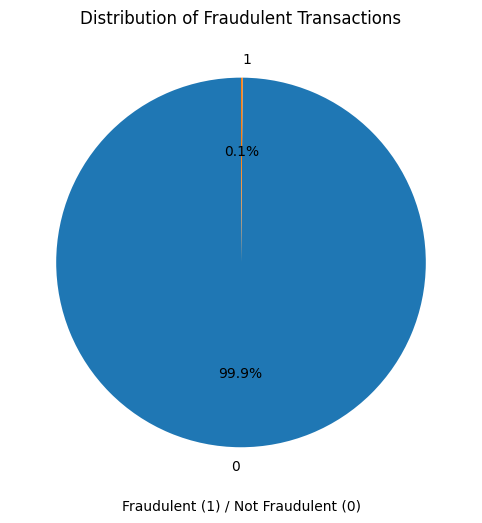

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Fraudulent Transactions')
target_counts = flattened_df['target'].value_counts()
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transFraud.png')
plt.show()


In [ ]:
csv_file = '/content/drive/MyDrive/Capstone Project/data/train_fraud_labels.csv'
fraudLabels.to_csv(csv_file, index=False)

print(f"JSON converted to CSV and saved as {csv_file}")

JSON converted to CSV and saved as /content/drive/MyDrive/Capstone Project/data/train_fraud_labels.csv


**Fraud Labels Observations**
- Binary classification labels for transactions
- Indicates fraudulent vs. legitimate transactions
- Ideal for training supervised fraud detection models

## 2.6 Data Understanding Summary



*   Only Transaction Data, Card Data and User Data will be used and merged for ML/AI modeling Techniques.
*   MCC_Codes data will be used for reference if required.



#3. Exploratory Data Analysis (EDA)

## 3.1. Data Exploration: using - cards_data

### 3.1.1 Data Visualization



In [ ]:
cardsData['credit_limit'] = cardsData['credit_limit'].replace('[\$,]', '', regex=True).astype(float)
cardsData['has_chip'] = cardsData['has_chip'].map({'YES': 1, 'NO': 0})
cardsData['card_on_dark_web'] = cardsData['card_on_dark_web'].map({'Yes': 1, 'No': 0})

#Define numeric columns
numeric_cols = ['cvv', 'num_cards_issued', 'credit_limit', 'year_pin_last_changed', 'has_chip', 'card_on_dark_web']


#### Distribution of Numeric Columns

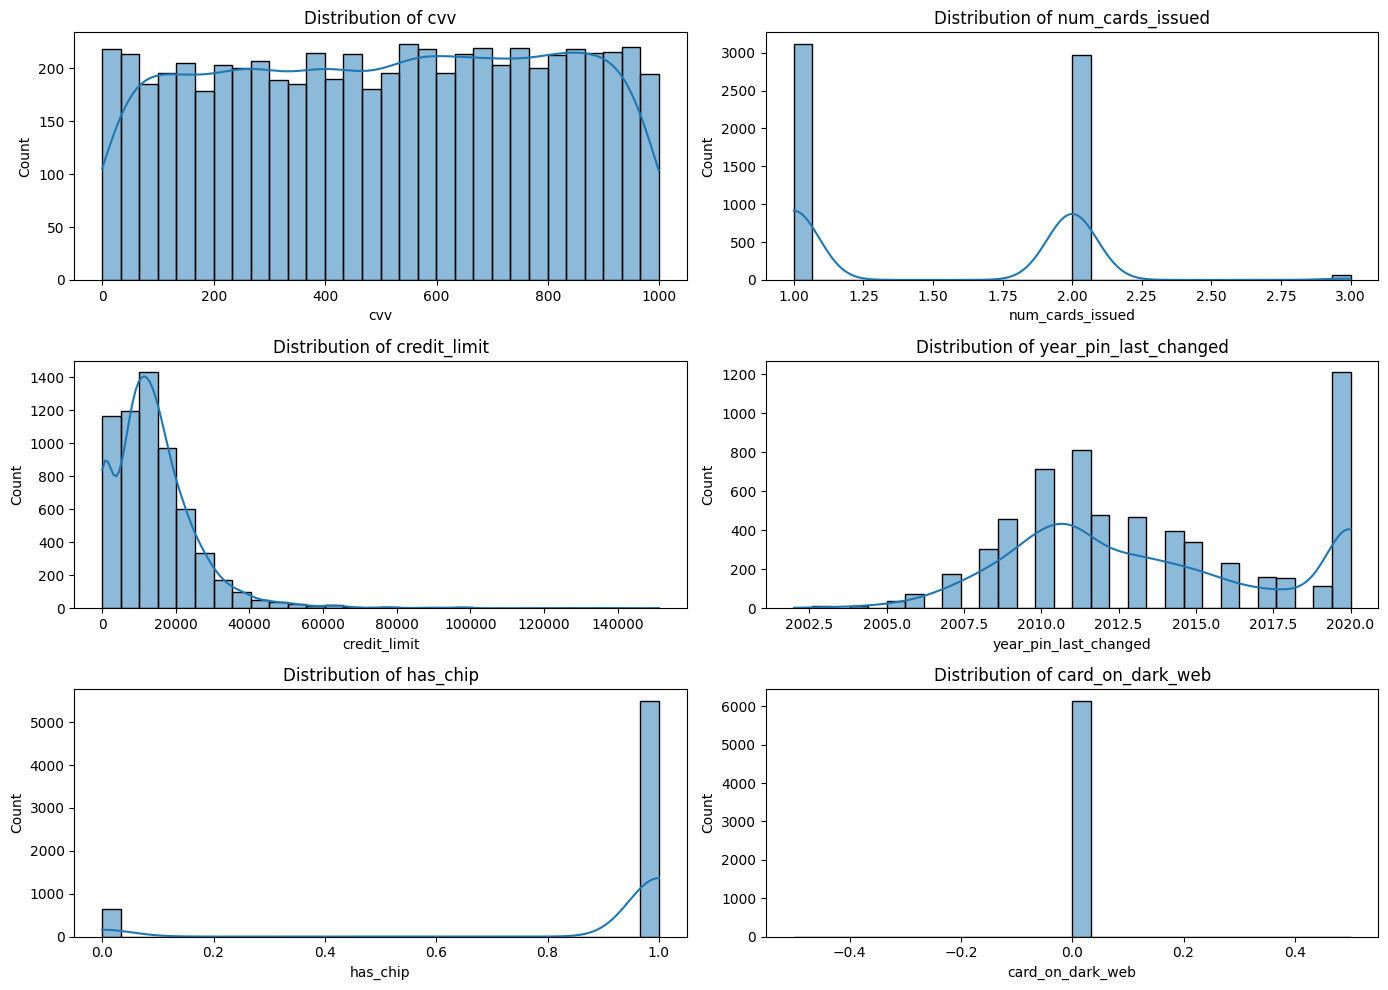

In [ ]:
#Distribution plots
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(cardsData[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/distPlots.png')
plt.show()

#### Correlation Heatmap

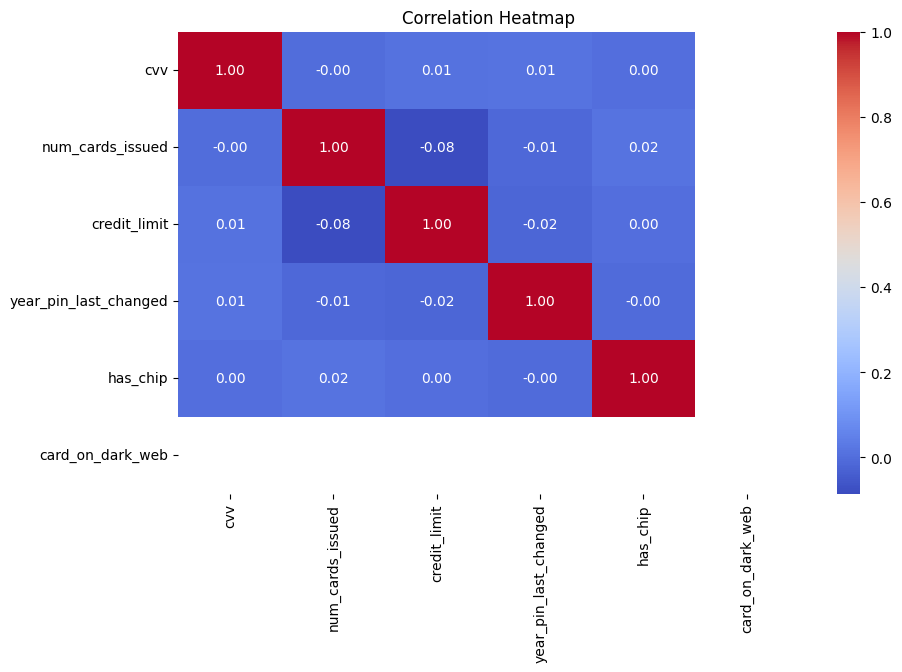

In [ ]:
#Correlation heatmap
correlation_matrix = cardsData[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/heatmap.png')
plt.show()

**Observations**

**Distribution Plots (Histograms + KDE)**

- cvv: Uniformly distributed (likely due to random generation or truncation).

- num_cards_issued: Mostly 1 or 2 cards, few outliers.

- credit_limit: Right-skewed distribution; most clients have lower credit limits.

- year_pin_last_changed: Clusters around early 2000s to 2020.

- has_chip: Binary distribution — mostly "YES" (1).

- card_on_dark_web: Almost all values are 0 — very few cards reported on the dark web.

**Correlation Heatmap**
- has_chip and card_on_dark_web show a slight negative correlation.

- credit_limit has low correlation with other features.

- num_cards_issued shows weak positive correlation with has_chip.

### 3.1.2 Data Quality Checks

In [ ]:
cardsData.shape

(6146, 13)

#### Check for Null values

In [ ]:
cardsData.isnull().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

#### Check for zero Values in numerical features

In [ ]:
print('\nZero Values in Numerical Features:')
zero_counts = cardsData.eq(0).sum()
print(zero_counts)


Zero Values in Numerical Features:
id                          1
client_id                   4
card_brand                  0
card_type                   0
card_number                 0
expires                     0
cvv                         4
has_chip                  646
num_cards_issued            0
credit_limit               31
acct_open_date              0
year_pin_last_changed       0
card_on_dark_web         6146
dtype: int64


#### Check for Zero values in categorial feature

In [ ]:
print('\nZero Values in Categorical Features:')
zero_counts_cat = cardsData.select_dtypes(exclude=np.number).eq('0').sum()
print(zero_counts_cat)


Zero Values in Categorical Features:
card_brand        0
card_type         0
expires           0
acct_open_date    0
dtype: int64


#### Check for duplicates

In [ ]:
print('\nChecking for Duplicate Rows:')
duplicate_count = cardsData.duplicated().sum()
print(f'Number of Duplicate Rows: {duplicate_count}')


Checking for Duplicate Rows:
Number of Duplicate Rows: 0


#### Check for unique


In [ ]:
print('\nUnique Values per Column:')
unique_counts = cardsData.nunique()
print(unique_counts)


Unique Values per Column:
id                       6146
client_id                2000
card_brand                  4
card_type                   3
card_number              6146
expires                   259
cvv                       998
has_chip                    2
num_cards_issued            3
credit_limit             3654
acct_open_date            303
year_pin_last_changed      19
card_on_dark_web            1
dtype: int64


#### Check for outliers


In [ ]:
#Checking for Outliers using IQR
print('\nOutlier Detection:')
for col in cardsData.select_dtypes(include=np.number).columns:
    Q1 = cardsData[col].quantile(0.25)
    Q3 = cardsData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((cardsData[col] < lower_bound) | (cardsData[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')


Outlier Detection:
id: 0 outliers
client_id: 0 outliers
card_number: 402 outliers
cvv: 0 outliers
has_chip: 646 outliers
num_cards_issued: 0 outliers
credit_limit: 235 outliers
year_pin_last_changed: 0 outliers
card_on_dark_web: 0 outliers


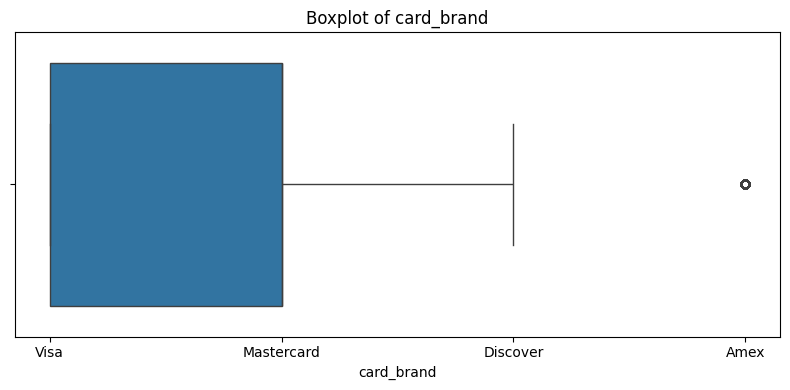

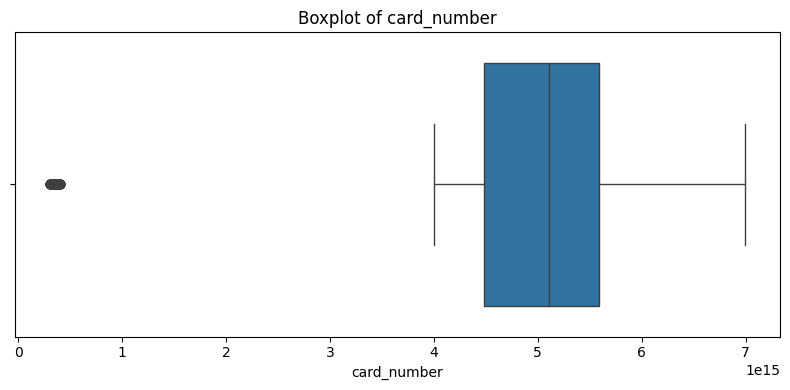

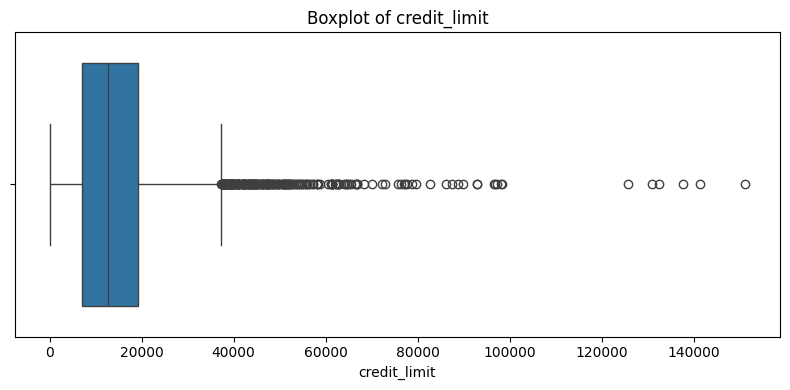

In [ ]:
# Boxplot: card_brand
plt.figure(figsize=(8, 4))
sns.boxplot(x=cardsData['card_brand'])
plt.title('Boxplot of card_brand')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/boxplot_card_brand.png')
plt.show()

# Boxplot: card_number
plt.figure(figsize=(8, 4))
sns.boxplot(x=cardsData['card_number'])
plt.title('Boxplot of card_number')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/boxplot_card_number.png')
plt.show()

# Boxplot: credit_limit
plt.figure(figsize=(8, 4))
sns.boxplot(x=cardsData['credit_limit'])
plt.title('Boxplot of credit_limit')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/boxplot_credit_limit.png')
plt.show()

## 3.2. Data Exploration: using - users_data

### 3.2.1 Data Visualization

In [ ]:
for col in ['per_capita_income', 'yearly_income', 'total_debt']:
    userData[col] = userData[col].replace('[\$,]', '', regex=True).astype(float)

#### Distribution of Numeric Columns

In [ ]:
## Distribution plots
numeric_cols = ['current_age', 'retirement_age', 'birth_year', 'birth_month',
                'latitude', 'longitude', 'per_capita_income', 'yearly_income',
                'total_debt', 'credit_score', 'num_credit_cards']

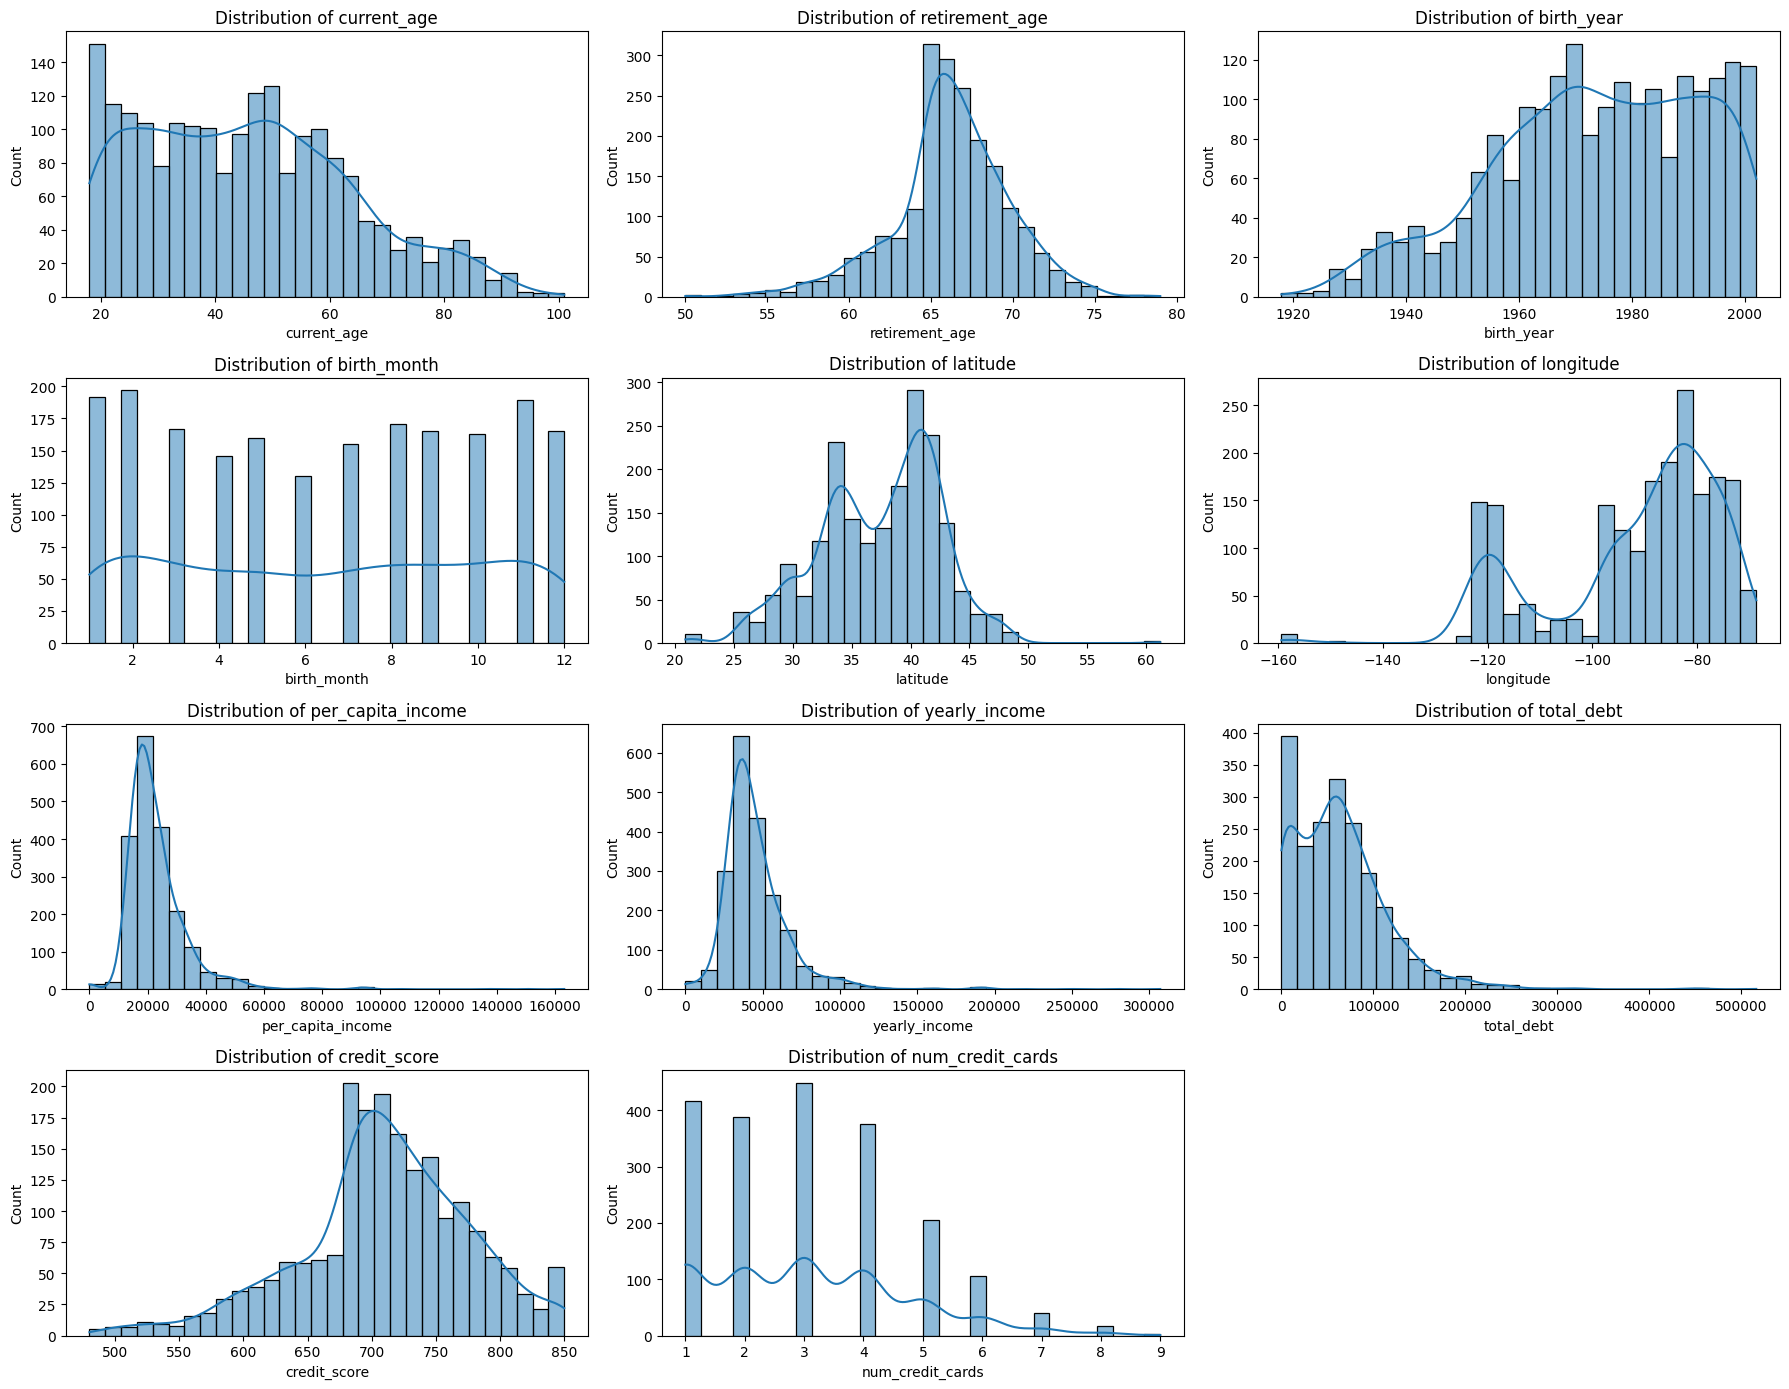

In [ ]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(userData[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/distPlots_usersdata.png')
plt.show()

In [ ]:
userData['gender'] = LabelEncoder().fit_transform(userData['gender'])

#### Correlation Heatmap

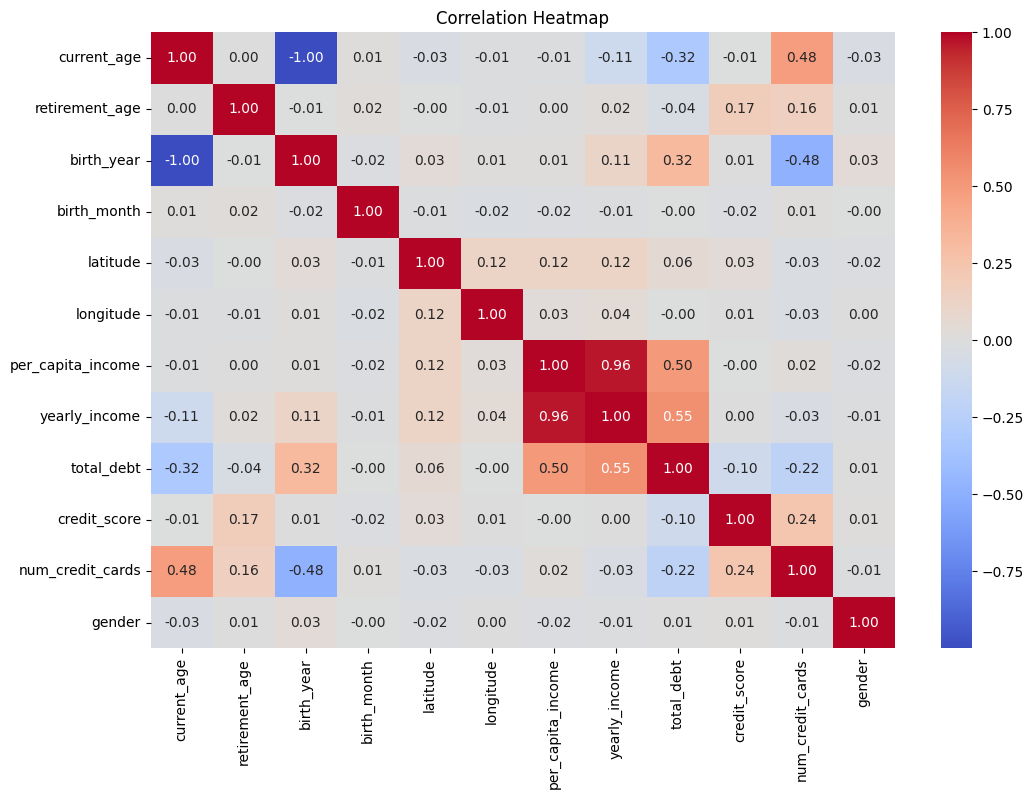

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = userData[numeric_cols + ['gender']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/heatmap_usersdata.png')
plt.show()

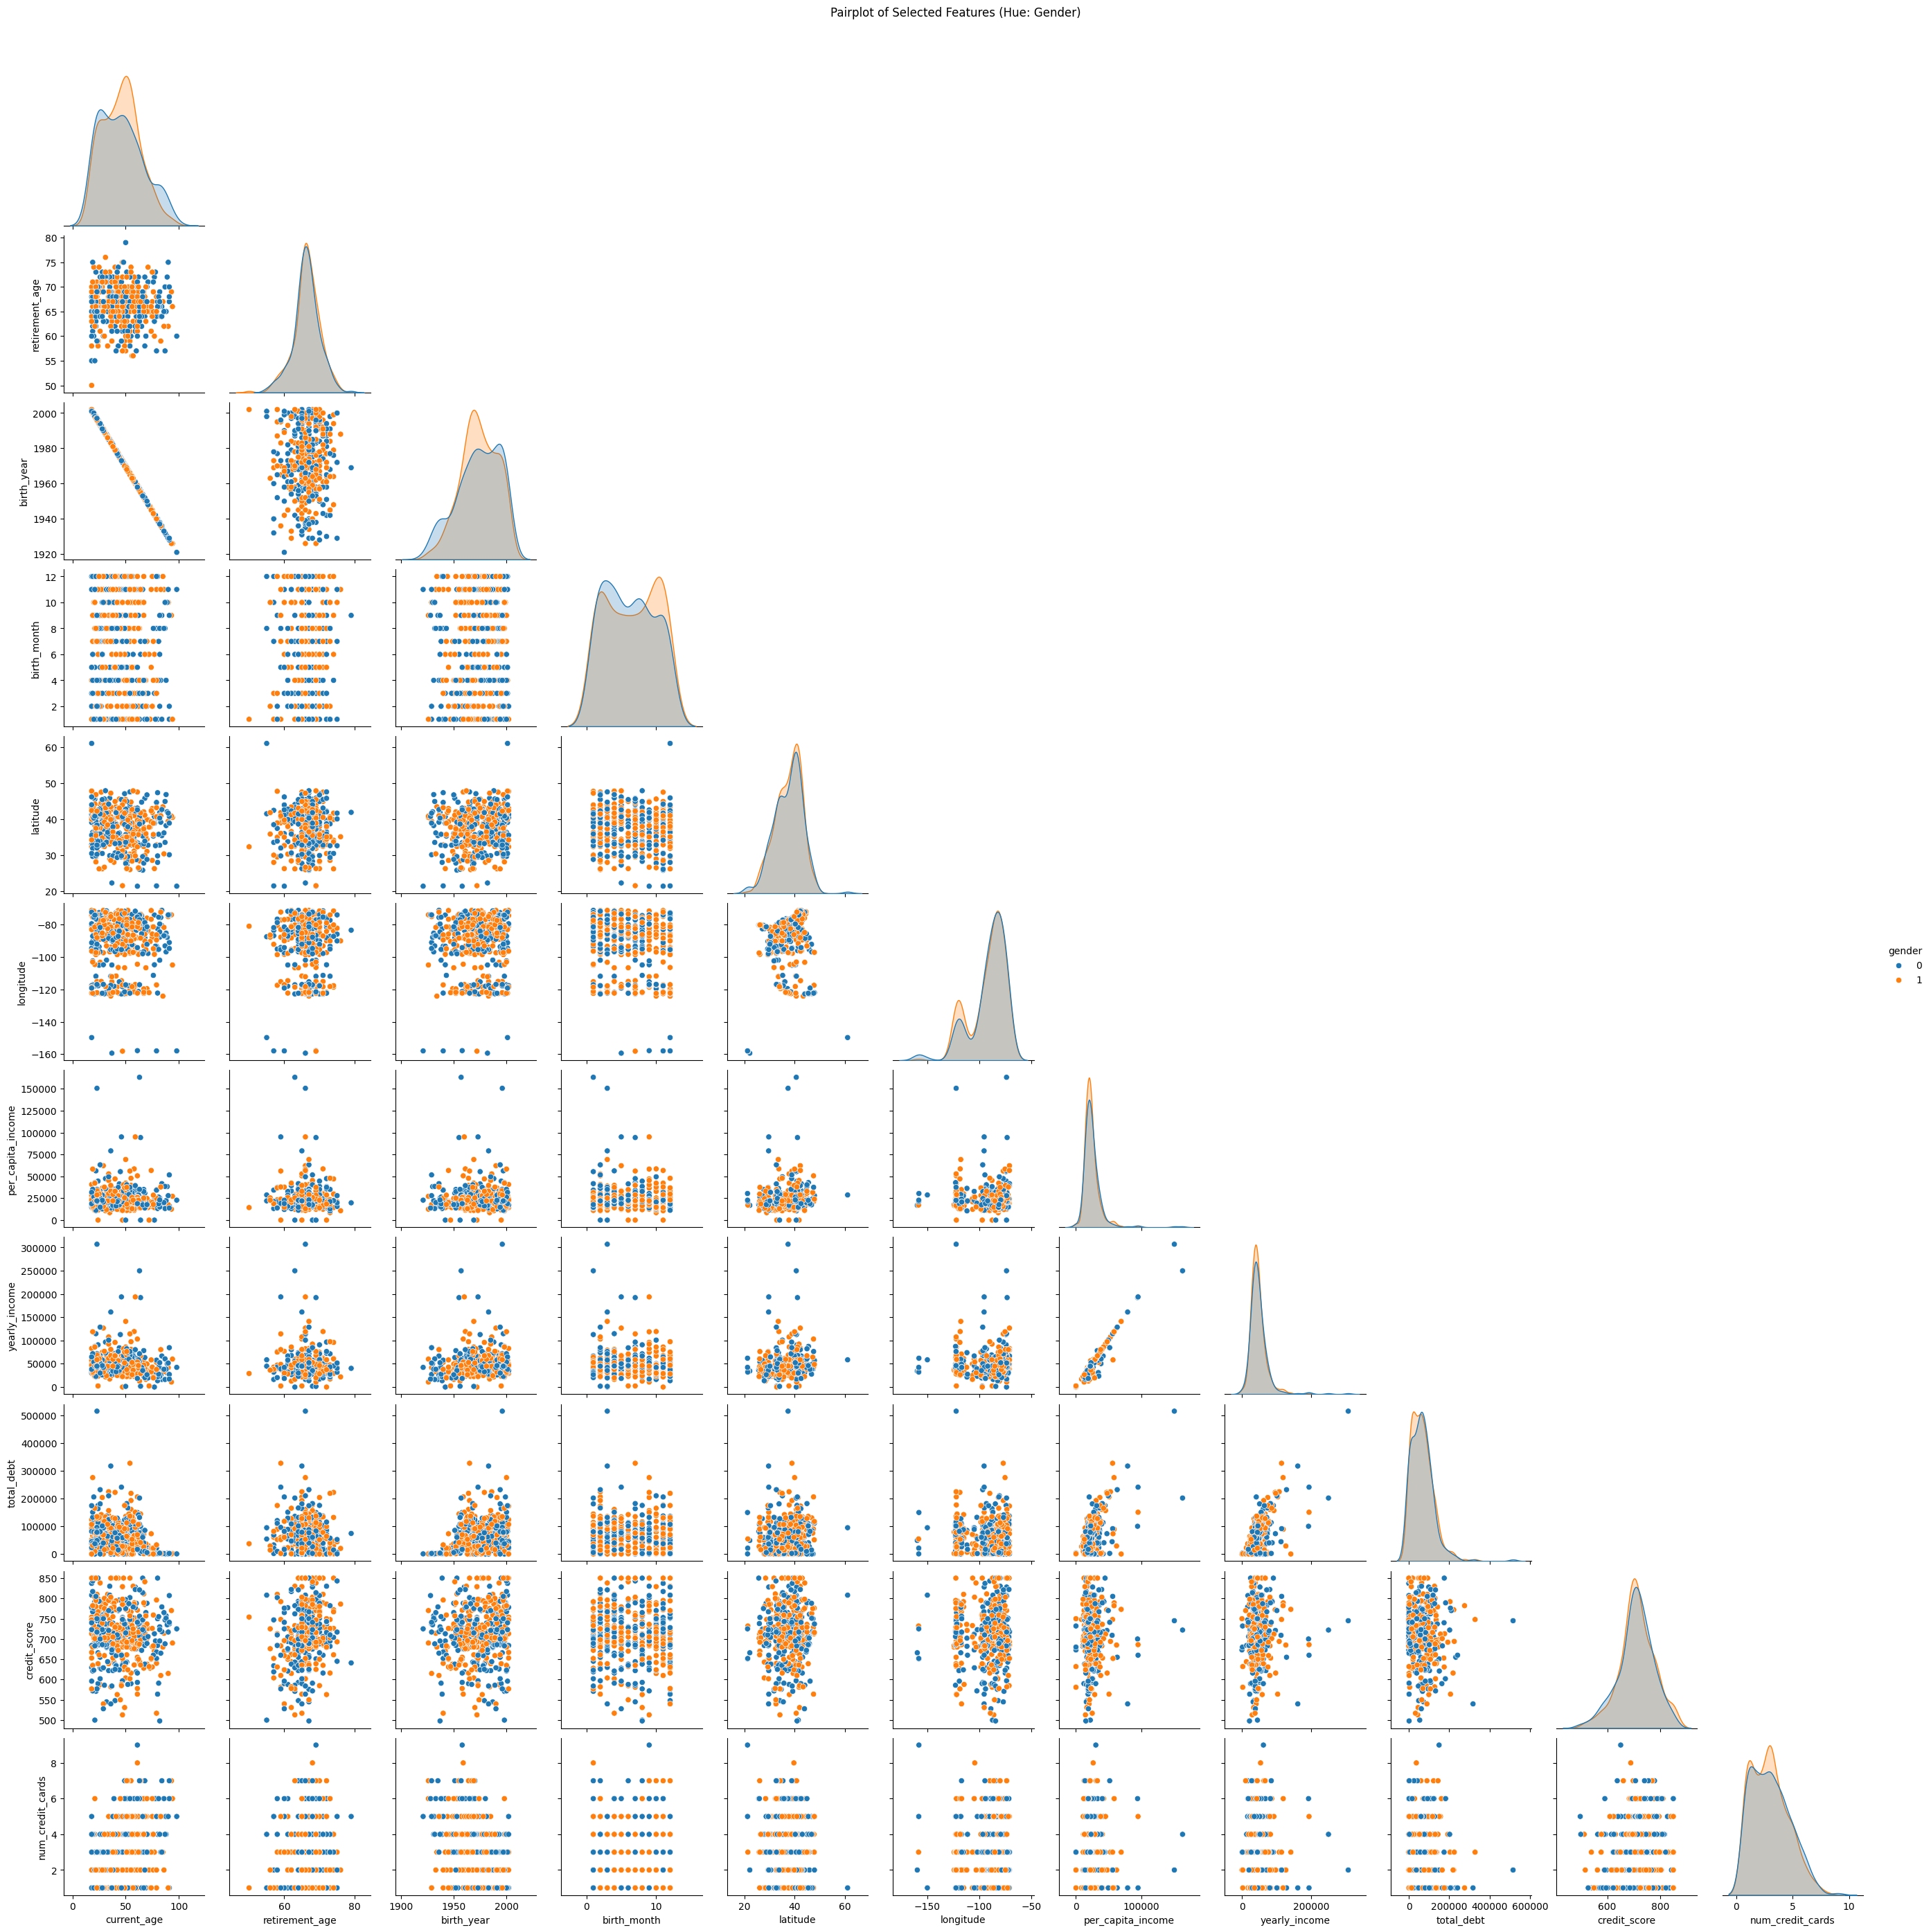

In [ ]:
#Pairplot (sample to avoid overplotting)
sampled_data = userData[numeric_cols + ['gender']].sample(n=500, random_state=1)
sns.pairplot(sampled_data, hue='gender', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features (Hue: Gender)", y=1.02)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/pairplot_usersdata.png')
plt.show()

**Observations**

**Distribution Insights**

- Age Distribution: Most users are aged 40–70; typical retirement ages range from 60–70.

- Birth Month: Fairly uniform across months.

- Credit Score: Generally well-distributed, centered around 700–750.

- Per Capita & Yearly Income: Right-skewed (majority earn less, few very high).

- Total Debt: Right-skewed; some users carry significant debt.

- Number of Credit Cards: Peaks around 4–5

**Correlation Insights (from Heatmap)**

**Strong positive correlation between:**

- yearly_income and per_capita_income

**Weak correlation between:**

- credit_score and debt/income levels

- num_credit_cards and credit score

**Pairplot Highlights**
- Gender-based clusters are not strongly separated in most numeric features.

- Outliers are visible in income and debt values.

- Latitude/Longitude pairs show varied user geographies.

### 3.2.2 Data Quality Checks

In [ ]:
userData.shape

(2000, 14)

#### **Check for Null values**

In [ ]:
userData.isnull().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

#### Check for zero Values in numerical features

In [ ]:
print('\nZero Values in Numerical Features:')
zero_counts = userData.eq(0).sum()
print(zero_counts)


Zero Values in Numerical Features:
id                      1
current_age             0
retirement_age          0
birth_year              0
birth_month             0
gender               1016
address                 0
latitude                0
longitude               0
per_capita_income      15
yearly_income           0
total_debt            102
credit_score            0
num_credit_cards        0
dtype: int64


#### Check for Zero values in categorial feature

In [ ]:
print('\nZero Values in Categorical Features:')
zero_counts_cat = userData.select_dtypes(exclude=np.number).eq('0').sum()
print(zero_counts_cat)


Zero Values in Categorical Features:
address    0
dtype: int64


#### Check for duplicates

In [ ]:
print('\nChecking for Duplicate Rows:')
duplicate_count = userData.duplicated().sum()
print(f'Number of Duplicate Rows: {duplicate_count}')


Checking for Duplicate Rows:
Number of Duplicate Rows: 0


#### Check for unique

In [ ]:
print('\nUnique Values per Column:')
unique_counts = userData.nunique()
print(unique_counts)


Unique Values per Column:
id                   2000
current_age            80
retirement_age         29
birth_year             80
birth_month            12
gender                  2
address              1999
latitude              989
longitude            1224
per_capita_income    1754
yearly_income        1948
total_debt           1880
credit_score          321
num_credit_cards        9
dtype: int64


#### Check for outliers

In [ ]:
print('\nOutlier Detection:')
for col in userData.select_dtypes(include=np.number).columns:
    Q1 = userData[col].quantile(0.25)
    Q3 = userData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((userData[col] < lower_bound) | (userData[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')


Outlier Detection:
id: 0 outliers
current_age: 1 outliers
retirement_age: 210 outliers
birth_year: 1 outliers
birth_month: 0 outliers
gender: 0 outliers
latitude: 12 outliers
longitude: 17 outliers
per_capita_income: 123 outliers
yearly_income: 118 outliers
total_debt: 51 outliers
credit_score: 67 outliers
num_credit_cards: 20 outliers


## 3.3. Data Exploration: using - transactions_data

### 3.3.1 Data Visualization

In [ ]:
transactionsData['amount'] = transactionsData['amount'].replace('[\$,()]', '', regex=True).astype(float)


#### Distribution of Numeric Columns

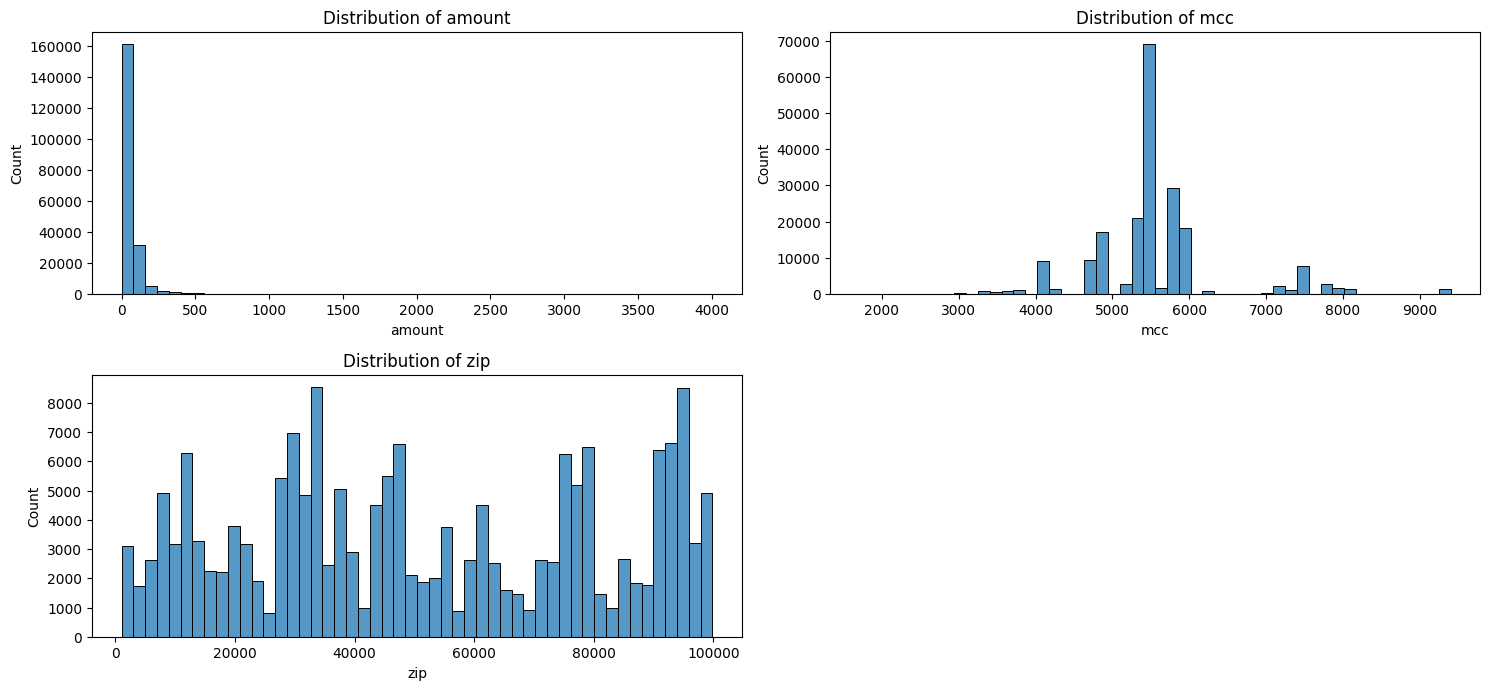

In [ ]:
numeric_cols = ['amount','mcc', 'zip']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(transactionsData[col], bins=50, kde=False)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/distPlots_transactionsdata.png')
plt.show()

#### Distribution of Chip Use

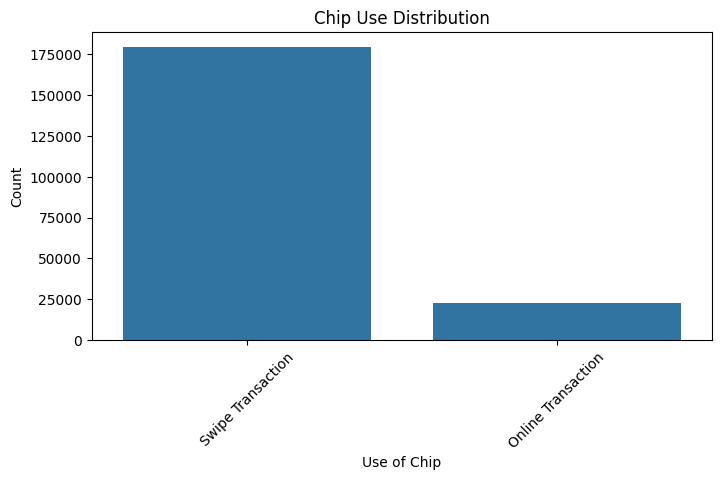

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=transactionsData, x='use_chip', order=transactionsData['use_chip'].value_counts().index)
plt.title('Chip Use Distribution')
plt.xlabel('Use of Chip')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transMethod.png')
plt.show()

#### Distribution of Top 10 Merchant States

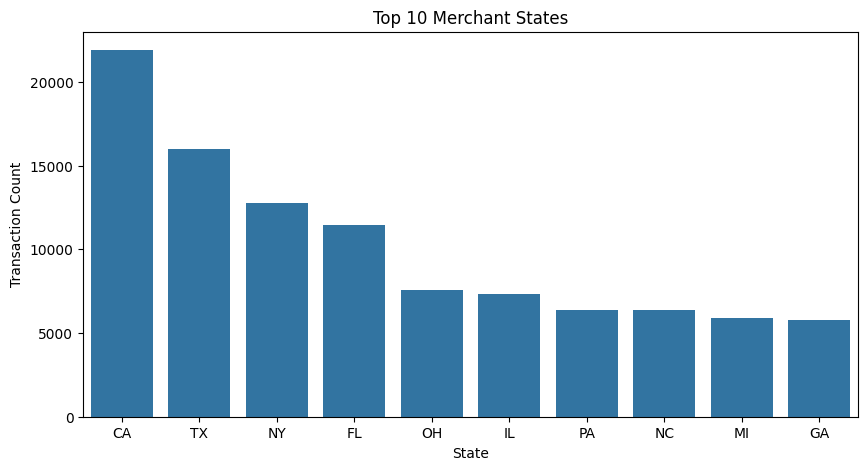

In [ ]:
top_states = transactionsData['merchant_state'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Merchant States')
plt.ylabel('Transaction Count')
plt.xlabel('State')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transCount.png')
plt.show()

#### Distribution of MerchantIds

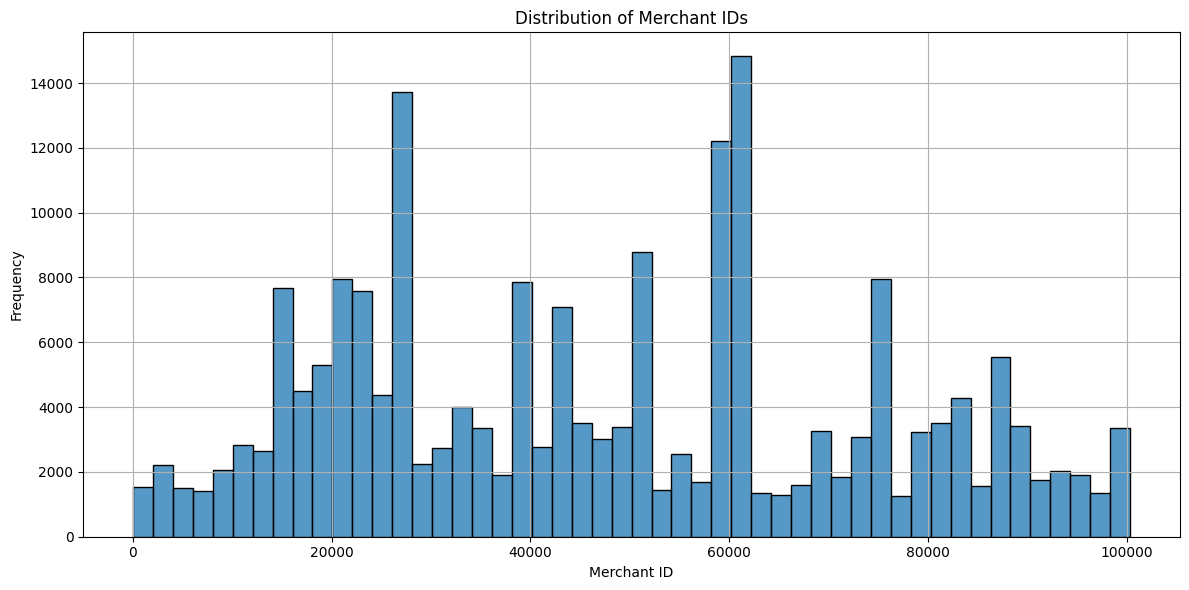

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(transactionsData['merchant_id'], bins=50, kde=False)
plt.title('Distribution of Merchant IDs')
plt.xlabel('Merchant ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transMerchant.png')
plt.show()

#### Top 20 Merchant Counts

In [ ]:
merchant_counts = transactionsData['merchant_id'].value_counts().reset_index()
merchant_counts.columns = ['merchant_id', 'transaction_count']
merchant_counts = merchant_counts.sort_values('transaction_count', ascending=False)
merchant_counts.head(10)

merchant_id  transaction_count
0        59935               9714
1        27092               9274
2        61195               8696
3        43293               5805
4        39021               5770
5        22204               5421
6        14528               4934
7        50783               4732
8        60569               4729
9        75781               4117

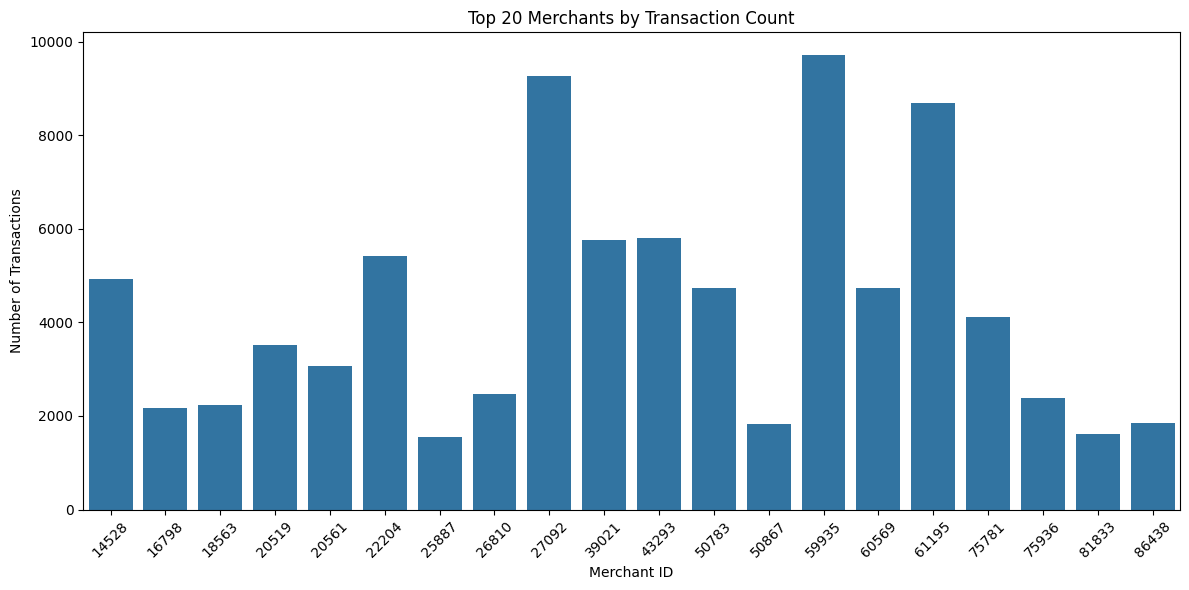

In [ ]:
top_merchants = merchant_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='merchant_id', y='transaction_count', data=top_merchants)
plt.title('Top 20 Merchants by Transaction Count')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transMerchant.png')
plt.show()

#### Correlation Heatmap

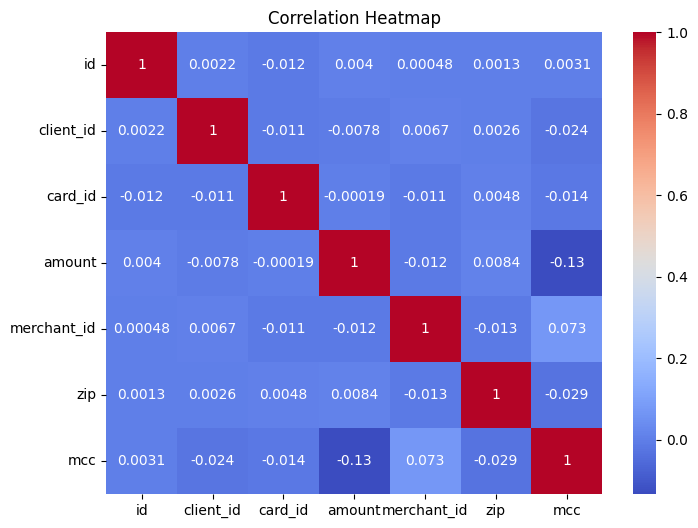

In [ ]:
numeric_df = transactionsData.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/heatmap.png')
plt.show()

**Transaction Data Observation2:**

| Feature Pair          | Correlation | Observation                                                                               |
| --------------------- | ----------- | ----------------------------------------------------------------------------------------- |
| `mcc` & `merchant_id` | **0.077**   | Highest correlation in the matrix, though still weak. Possibly similar merchant types.    |
| `amount` & `hour`     | **0.054**   | Slight tendency for amount to vary with hour—could relate to spending patterns.           |
| `mcc` & `amount`      | **−0.034**  | Minor negative correlation—some merchant categories may have lower/higher average spends. |
| `mcc` & `hour`        | **0.031**   | Possibly some merchant categories operate more at specific times.                         |
| `zip` & `card_id`     | **0.017**   | Very weak correlation; some spatial relevance to card issuance or usage.                  |


**No Strong Correlations:**

- All values are close to 0, indicating little to no linear relationship between variables.

**Feature Independence:**

- Variables such as amount, mcc, hour, and merchant_id are largely independent, which may provide diverse signals in predictive modeling.

### 3.3.2 Data Quality Checks

In [ ]:
transactionsData.shape

(202133, 12)

#### Check for Null values

In [ ]:
transactionsData.isnull().sum()

id                     0
date                   0
client_id              0
card_id                0
amount                 0
use_chip               0
merchant_id            0
merchant_city          0
merchant_state     22310
zip                23301
mcc                    0
errors            199006
dtype: int64

#### Check for zero Values in numerical features

In [ ]:
print('\nZero Values in Numerical Features:')
zero_counts = transactionsData.eq(0).sum()
print(zero_counts)


Zero Values in Numerical Features:
id                  0
date                0
client_id         193
card_id            46
amount            166
use_chip            0
merchant_id         0
merchant_city       0
merchant_state      0
zip                 0
mcc                 0
errors              0
dtype: int64


#### Check for Zero values in categorial feature

In [ ]:
print('\nZero Values in Categorical Features:')
zero_counts_cat = transactionsData.select_dtypes(exclude=np.number).eq('0').sum()
print(zero_counts_cat)


Zero Values in Categorical Features:
date              0
use_chip          0
merchant_city     0
merchant_state    0
errors            0
dtype: int64


#### Check for duplicates

In [ ]:
print('\nChecking for Duplicate Rows:')
duplicate_count = transactionsData.duplicated().sum()
print(f'Number of Duplicate Rows: {duplicate_count}')


Checking for Duplicate Rows:
Number of Duplicate Rows: 0


#### Check for unique

In [ ]:
print('\nUnique Values per Column:')
unique_counts = userData.nunique()
print(unique_counts)


Unique Values per Column:
id                   2000
current_age            80
retirement_age         29
birth_year             80
birth_month            12
gender                  2
address              1999
latitude              989
longitude            1224
per_capita_income    1754
yearly_income        1948
total_debt           1880
credit_score          321
num_credit_cards        9
dtype: int64


#### Check for Outliers

In [ ]:
print('\nOutlier Detection:')
for col in transactionsData.select_dtypes(include=np.number).columns:
    Q1 = transactionsData[col].quantile(0.25)
    Q3 = transactionsData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((transactionsData[col] < lower_bound) | (transactionsData[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')


Outlier Detection:
id: 0 outliers
client_id: 0 outliers
card_id: 0 outliers
amount: 8939 outliers
merchant_id: 0 outliers
zip: 0 outliers
mcc: 32502 outliers


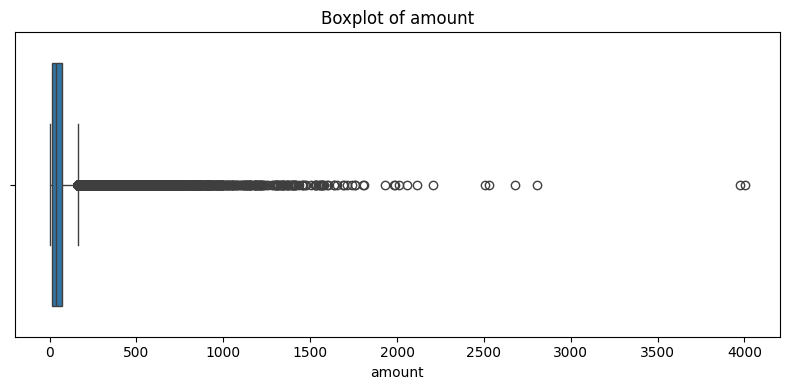

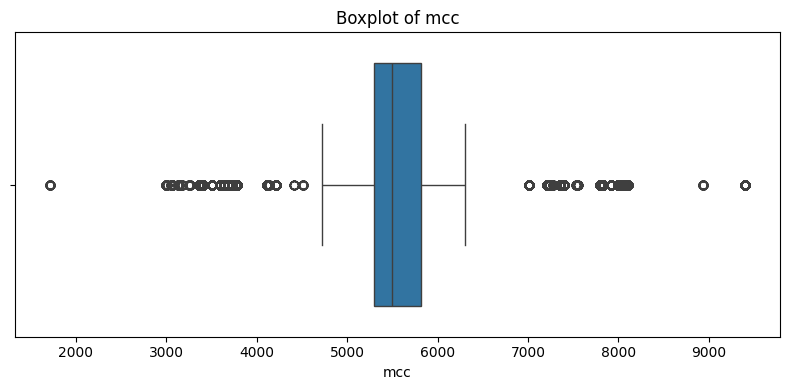

In [ ]:
# Boxplot: amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=transactionsData['amount'])
plt.title('Boxplot of amount')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/boxplot_amount.png')
plt.show()

# Boxplot: mcc
plt.figure(figsize=(8, 4))
sns.boxplot(x=transactionsData['mcc'])
plt.title('Boxplot of mcc')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/boxplot_mcc.png')
plt.show()



**Box Plot: Amount**
- Most transactions are clustered below approx $200.

- There are numerous high-value outliers (above $500, some even exceeding $4000).
- This is a right-skewed distribution, typical in financial data.

**Box Plot: mcc**
- The box shows that most values lie between approximately 4800 and 6000.
- Outliers are codes that fall significantly outside this range, such as:

    Low outliers ( apprxx 2000)

    High outliers (approx 9000)

Outliers in amount may reflect large purchases, refunds, or potential fraud.

Outliers in mcc could point to rare or suspicious merchant categories.

### 3.4. Data Exploration: using - train_fraud_labels

In [ ]:
flattened_df.shape

(8914963, 2)

In [ ]:
flattened_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      Int64
 1   target  int64
dtypes: Int64(1), int64(1)
memory usage: 144.5 MB


### 3.4.1 Data Visualization

#### Distribution of Numberical values

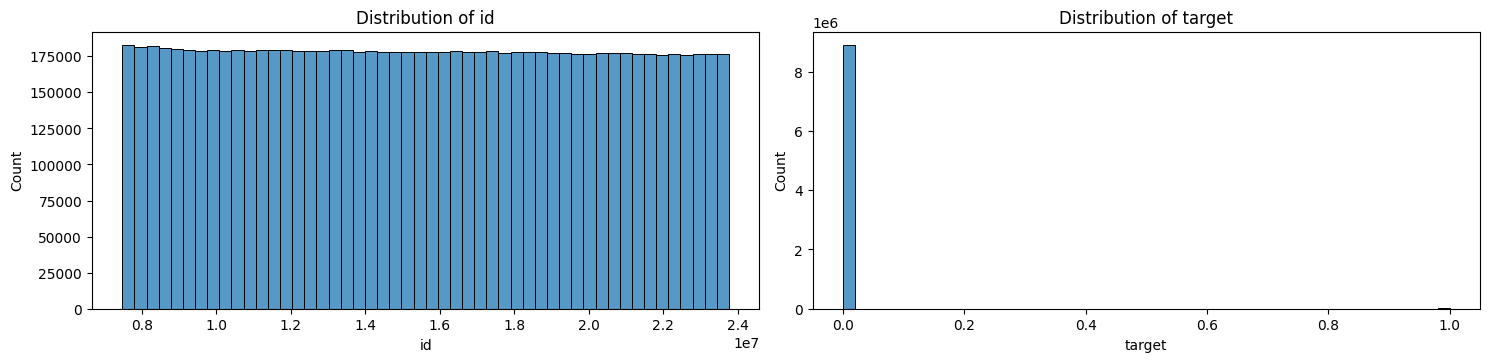

In [ ]:
numeric_cols = ['id','target']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(flattened_df[col], bins=50, kde=False)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/distPlots_fraudlabels.png')
plt.show()

**Distribution of Target**
- The target variable is a binary classification label (likely for fraud detection, churn, or anomaly detection).

- The distribution is highly imbalanced:

- Almost all values are 0 (non-target class).

- A very small portion is 1 (target class).

Conclusion: This is a class imbalance problem. For example:

If target = 1 means fraud, then fraud is rare — a common scenario in real-world datasets.

### 3.4.2 Data Quality Checks

#### Check for Null values

In [ ]:
flattened_df.isnull().sum()

id        0
target    0
dtype: int64

#### Check for duplicates

In [ ]:
print('\nChecking for Duplicate Rows:')
duplicate_count = flattened_df.duplicated().sum()
print(f'Number of Duplicate Rows: {duplicate_count}')


Checking for Duplicate Rows:
Number of Duplicate Rows: 0


#### Check for unique

In [ ]:
print('\nUnique Values per Column:')
unique_counts = flattened_df.nunique()
print(unique_counts)


Unique Values per Column:
id        8914963
target          2
dtype: int64


#### Check for Outliers

In [ ]:
print('\nOutlier Detection:')
for col in flattened_df.select_dtypes(include=np.number).columns:
    Q1 = flattened_df[col].quantile(0.25)
    Q3 = flattened_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((flattened_df[col] < lower_bound) | (flattened_df[col] > upper_bound)).sum()
    print(f'{col}: {outliers} outliers')


Outlier Detection:
id: 0 outliers
target: 13332 outliers


# 4. Data Preparation

In [ ]:
le = LabelEncoder()

## 4.1 Data Preparation: CardData

### 4.1.1 Converting object to numeric data type

In [ ]:
cardsData['credit_limit'] = cardsData['credit_limit'].apply(lambda x: str(x).lstrip('$')).astype(float)

### 4.1.2 Converting 'has_chip' values to Binary

In [ ]:
cardsData['has_chip'] = cardsData['has_chip'].map({'YES':1, 'NO':0})

### 4.1.3 Value Count Card Brand, CardType, hasChip...

In [ ]:
varCardsData = ['card_brand', 'card_type', 'has_chip', 'num_cards_issued', 'card_on_dark_web']
for i in varCardsData:
    print("Count of ", i)
    print(cardsData.value_counts(i))
    print('------------------\n')

Count of  card_brand
card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64
------------------

Count of  card_type
card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64
------------------

Count of  has_chip
Series([], Name: count, dtype: int64)
------------------

Count of  num_cards_issued
num_cards_issued
1    3114
2    2972
3      60
Name: count, dtype: int64
------------------

Count of  card_on_dark_web
card_on_dark_web
0    6146
Name: count, dtype: int64
------------------



### 4.1.4 Distribution of Cards

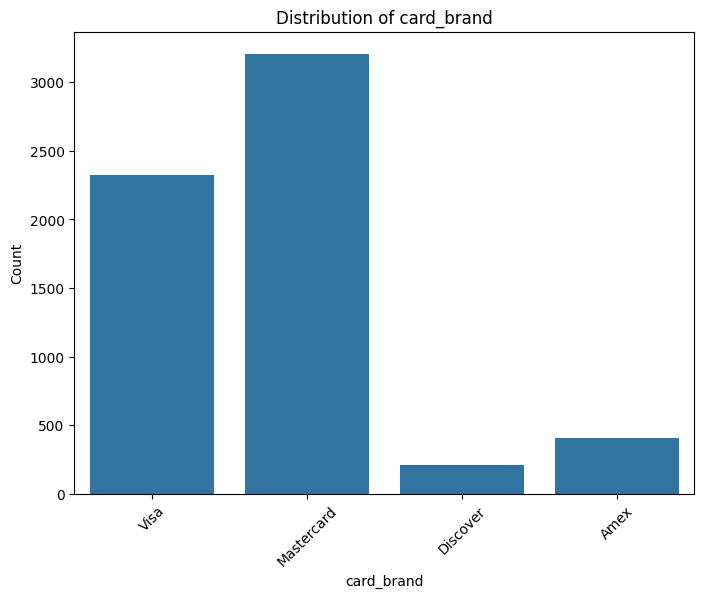

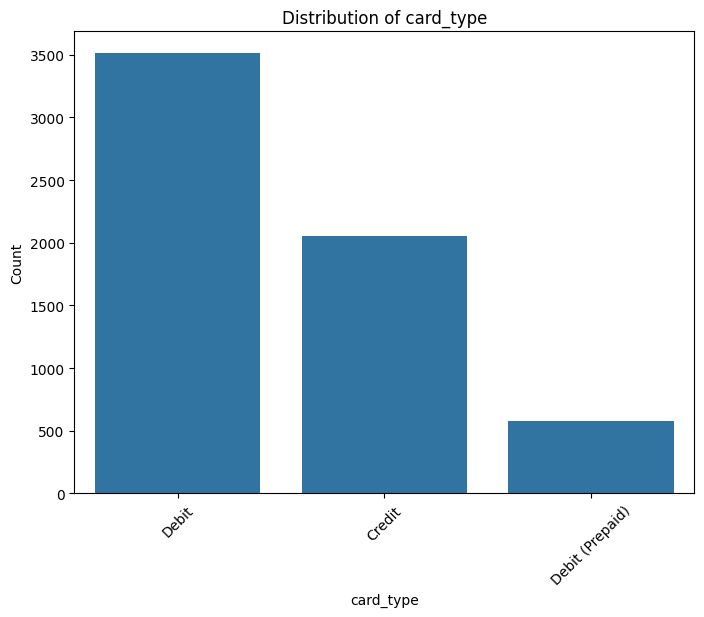

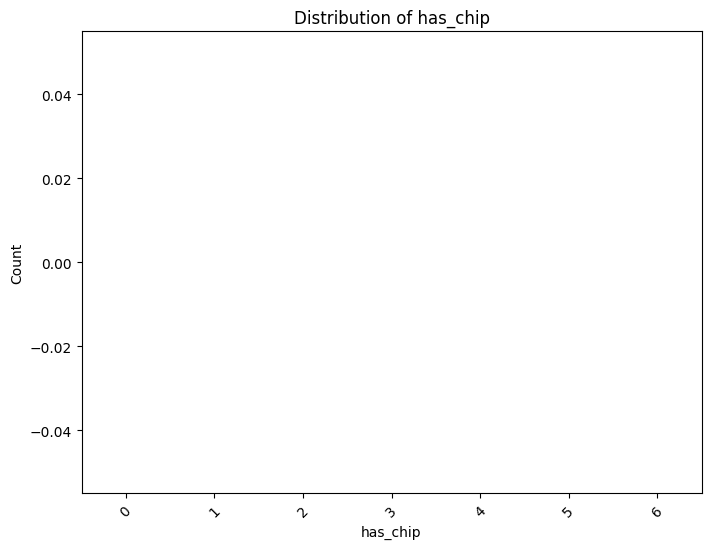

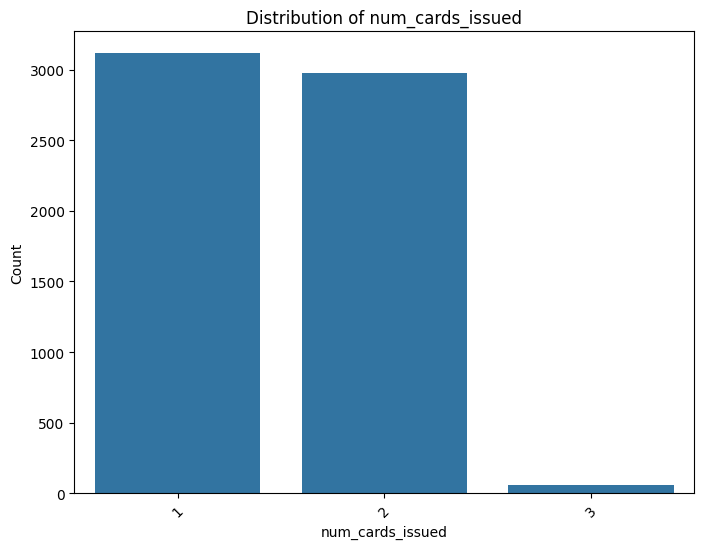

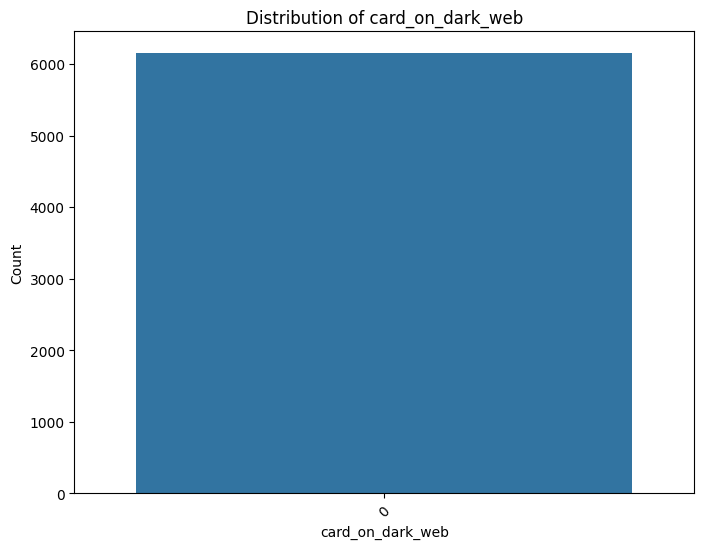

In [ ]:
# prompt: create plot for the varCardsData

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'varCardsData' is a list of column names you want to plot
for col in varCardsData:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=cardsData)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.savefig('/content/drive/MyDrive/Capstone Project/images/cards'+col+'.png')
    plt.show()

### 4.1.5 Label Encoding for CardBrand and Card Type

In [ ]:
for column in ['card_brand', 'card_type']:
    cardsData[column] = le.fit_transform(cardsData[column])

### 4.1.6 Rename Id to Card_ID

In [ ]:
cardsData.rename(columns={'id': 'card_id'}, inplace=True)

In [ ]:
cardsData.columns

Index(['card_id', 'client_id', 'card_brand', 'card_type', 'card_number',
       'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

### 4.1.7 TargetCardData columns to Merge

In [ ]:
targetCardsData = ['card_id', 'client_id', 'has_chip',
       'num_cards_issued', 'credit_limit', 'card_brand', 'card_type']

In [ ]:
cardsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   card_id                6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   int64  
 3   card_type              6146 non-null   int64  
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               0 non-null      float64
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 624.3+ KB


## 4.2 Data Preparation: UserData

### 4.2.1 Converting Object to numeric data type.

In [ ]:
var = ['per_capita_income', 'yearly_income', 'total_debt']
for i in var:
    userData[i] = userData[i].apply(lambda x: str(x).lstrip('$')).astype(float)

### 4.2.2 Renaming Id to ClientID

In [ ]:
userData.rename(columns={'id': 'client_id'}, inplace=True)

In [ ]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   int64  
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 218.9+ KB


### 4.2.3 Label Encoding ['gender'].

In [ ]:
userData['gender'] = le.fit_transform(userData['gender'])

### 4.2.4 TargetUserData Columns to Merge

In [ ]:
targetUserData = ['client_id', 'current_age', 'retirement_age', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'gender']

## 4.3 Data Preparation: transactionData

### 4.3.1 replace 'amount' string column to float


In [ ]:
transactionsData['amount'] = transactionsData['amount'].replace('[\$,()]', '', regex=True).astype(float)

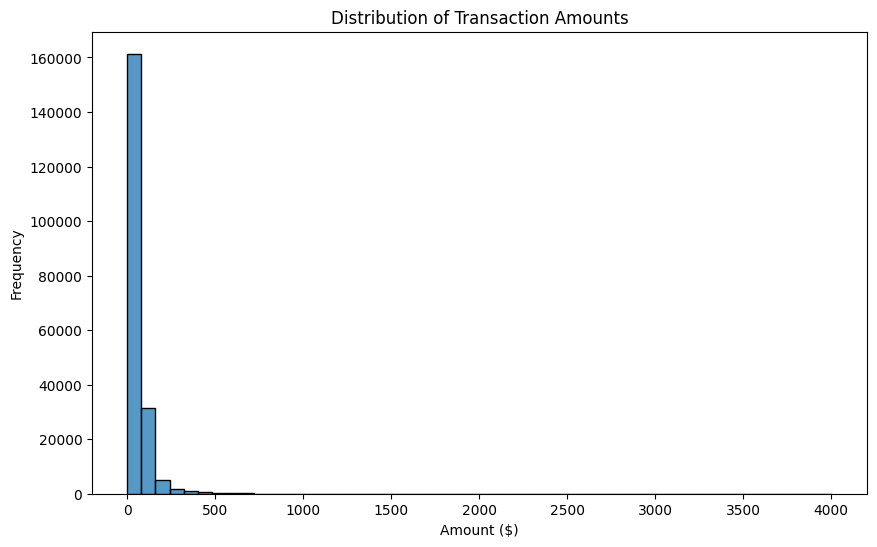

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(transactionsData['amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transAmount.png')
plt.show()

**Observations:**
Highly Skewed Distribution:

- The distribution is heavily right-skewed (positively skewed), meaning most transactions have relatively small amounts.

- A large majority of transaction amounts are concentrated near $0, forming a tall, narrow spike.

**Long Tail:**

- There's a long tail stretching toward the right, going up to amounts around $7000, but very few transactions fall in that range.

**Outliers Present:**

- The sparse bars far to the right suggest the presence of outliers or high-value transactions.

**Data Imbalance:**

- The massive spike near 0 and the flatness elsewhere indicate that most of your transactions are of small monetary value, which can pose a challenge for fraud detection models if high-value fraud is rare.

### 4.3.2  Convert date to datetime


In [ ]:
transactionsData['date'] = pd.to_datetime(transactionsData['date'])

 ### 4.3.3 Transactions Over Time

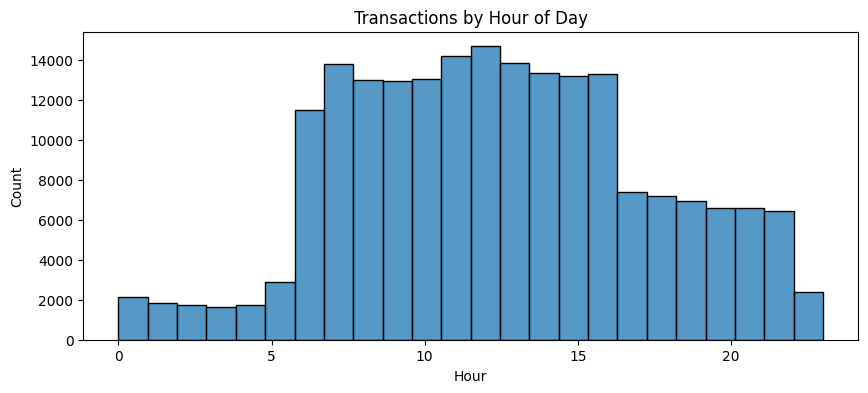

In [ ]:
transactionsData['hour'] = transactionsData['date'].dt.hour
plt.figure(figsize=(10, 4))
sns.histplot(transactionsData['hour'], bins=24, kde=False)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transHour.png')
plt.show()

**Key Observations:**

- Peak transaction hours: Transactions sharply increase starting from 6 AM and peak between 10 AM to 1 PM, with each of these hours handling close to or just above 1 million transactions.

- Low activity hours: From 12 AM to 5 AM, transaction volume remains significantly low, likely due to overnight inactivity.

- Gradual decline: After the 1 PM peak, transaction volume gradually decreases, with a noticeable drop after 4 PM.

- Late-night lows: The lowest activity is again observed post-9 PM through midnight.

**Interpretation:**
- This pattern is consistent with consumer behavior and business hours—most financial activities occur during regular daytime hours when businesses are open and customers are active.

- Early morning and late evening dips suggest limited 24/7 activity in the dataset.

### 4.3.4 transactionData Errors: Unique

In [ ]:
transactionsData['errors'].unique()

array([nan, 'Technical Glitch', 'Bad Expiration', 'Bad Card Number',
       'Insufficient Balance', 'Bad PIN', 'Bad CVV', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch'], dtype=object)

### 4.3.5 FillNA for errors

In [ ]:
transactionsData['errors'] = transactionsData['errors'].fillna('No Errors')

errors = set()
for i in transactionsData['errors']:
    for j in i.split(','):
        errors.add(j.strip())

errors = list(errors)
errors

['Bad Card Number',
 'Insufficient Balance',
 'Technical Glitch',
 'Bad CVV',
 'Bad Expiration',
 'Bad Zipcode',
 'No Errors',
 'Bad PIN']

### 4.3.6 Value Count useChip,errors, mcc and merchantId

In [ ]:
varTransactionData = ['use_chip', 'errors', 'mcc', 'merchant_id']
for i in varTransactionData:
    print("Count of ", i)
    print(transactionsData.value_counts(i))
    print('------------------\n')

Count of  use_chip
use_chip
Swipe Transaction     179823
Online Transaction     22310
Name: count, dtype: int64
------------------

Count of  errors
errors
No Errors                                199006
Insufficient Balance                       1904
Bad PIN                                     518
Technical Glitch                            379
Bad Card Number                             108
Bad CVV                                      92
Bad Expiration                               79
Bad Zipcode                                  22
Insufficient Balance,Technical Glitch         7
Bad Card Number,Insufficient Balance          6
Bad PIN,Insufficient Balance                  5
Bad PIN,Technical Glitch                      2
Bad Expiration,Technical Glitch               1
Bad CVV,Technical Glitch                      1
Bad Expiration,Insufficient Balance           1
Bad Card Number,Bad CVV                       1
Bad Card Number,Bad Expiration                1
Name: count, dtype: int64
--

### 4.3.7 Convert amount to numeric and coerce errors to NaN

In [ ]:
transactionsData['amount'] = pd.to_numeric(transactionsData['amount'], errors='coerce')



### 4.3.8 Create transactionType Column

In [ ]:
transactionsData['transaction_type'] = transactionsData['amount'].apply(lambda x: 'Debit' if x >= 0 else 'Credit')

In [ ]:
transactionsData['errors'].isna().sum()

np.int64(0)

### 4.3.9 one-hot encoded columns

In [ ]:
split_errors = transactionsData['errors'].apply(lambda x: [e.strip() for e in x.split(',')])


In [ ]:
mlb = MultiLabelBinarizer()
error_onehot = pd.DataFrame(mlb.fit_transform(split_errors),
                            columns=mlb.classes_,
                            index=transactionsData.index)

transactionsData = pd.concat([transactionsData, error_onehot], axis=1)

### 4.3.10 Drop errors column cheeck

In [ ]:
transactionsData.drop('errors', axis=1, inplace=True)
transactionsData.shape

(202133, 21)

### 4.3.11 Label Encoding

In [ ]:
for column in ['mcc', 'transaction_type', 'use_chip', 'merchant_city', 'merchant_state', 'zip']:
    transactionsData[column] = le.fit_transform(transactionsData[column])

### 4.3.12 Transaction data columsn to list

In [ ]:
targetDropTransactionData = ['date', 'merchant_id']

In [ ]:
transactionsData.columns.tolist()

['id',
 'date',
 'client_id',
 'card_id',
 'amount',
 'use_chip',
 'merchant_id',
 'merchant_city',
 'merchant_state',
 'zip',
 'mcc',
 'hour',
 'transaction_type',
 'Bad CVV',
 'Bad Card Number',
 'Bad Expiration',
 'Bad PIN',
 'Bad Zipcode',
 'Insufficient Balance',
 'No Errors',
 'Technical Glitch']

## 4.4 Data Merge

### 4.4.1 Merge transactionsData and cardsData

In [ ]:
dtTransactionData = pd.merge(transactionsData[['id', 'client_id', 'card_id', 'date']], cardsData[['card_id', 'expires', 'acct_open_date', 'year_pin_last_changed']], on='card_id', how='inner')
dtTransactionData.head()

id  client_id  card_id                date  expires acct_open_date  \
0  7475327       1556     2972 2010-01-01 00:01:00  07/2022        05/2008   
1  7475328        561     4575 2010-01-01 00:02:00  12/2024        09/2005   
2  7475329       1129      102 2010-01-01 00:02:00  05/2020        01/2006   
3  7475331        430     2860 2010-01-01 00:05:00  10/2024        05/2004   
4  7475332        848     3915 2010-01-01 00:06:00  01/2020        07/2009   

   year_pin_last_changed  
0                   2008  
1                   2015  
2                   2008  
3                   2006  
4                   2014

In [ ]:
dtTransactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202133 entries, 0 to 202132
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     202133 non-null  int64         
 1   client_id              202133 non-null  int64         
 2   card_id                202133 non-null  int64         
 3   date                   202133 non-null  datetime64[ns]
 4   expires                202133 non-null  object        
 5   acct_open_date         202133 non-null  object        
 6   year_pin_last_changed  202133 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 10.8+ MB


### 4.4.2 Convert date field object to datetime

In [ ]:
dtTransactionData['date'] = pd.to_datetime(dtTransactionData['date'])

In [ ]:
dtTransactionData.head()

id  client_id  card_id                date  expires acct_open_date  \
0  7475327       1556     2972 2010-01-01 00:01:00  07/2022        05/2008   
1  7475328        561     4575 2010-01-01 00:02:00  12/2024        09/2005   
2  7475329       1129      102 2010-01-01 00:02:00  05/2020        01/2006   
3  7475331        430     2860 2010-01-01 00:05:00  10/2024        05/2004   
4  7475332        848     3915 2010-01-01 00:06:00  01/2020        07/2009   

   year_pin_last_changed  
0                   2008  
1                   2015  
2                   2008  
3                   2006  
4                   2014

### 4.3.3 Preprocessing Date & Time

#### dates in months

In [ ]:
dtTransactionData['expires'] = pd.to_datetime(dtTransactionData['expires'], format='%m/%Y')
dtTransactionData['acct_open_date'] = pd.to_datetime(dtTransactionData['acct_open_date'], format='%m/%Y')
dtTransactionData['year_pin_last_changed'] = pd.to_datetime(dtTransactionData['year_pin_last_changed'], format='%Y')

In [ ]:
dtTransactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202133 entries, 0 to 202132
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     202133 non-null  int64         
 1   client_id              202133 non-null  int64         
 2   card_id                202133 non-null  int64         
 3   date                   202133 non-null  datetime64[ns]
 4   expires                202133 non-null  datetime64[ns]
 5   acct_open_date         202133 non-null  datetime64[ns]
 6   year_pin_last_changed  202133 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(3)
memory usage: 10.8 MB


In [ ]:
dtTransactionData['days_to_expire'] = ((dtTransactionData['expires'].dt.year - dtTransactionData['date'].dt.year) * 12) + (dtTransactionData['expires'].dt.month - dtTransactionData['date'].dt.month) #(in months)

dtTransactionData['opened_since'] = ((dtTransactionData['date'].dt.year - dtTransactionData['acct_open_date'].dt.year) * 12) + (dtTransactionData['date'].dt.month - dtTransactionData['acct_open_date'].dt.month) #(in months)

dtTransactionData['pin_updated_since'] = (dtTransactionData['year_pin_last_changed'].dt.year - dtTransactionData['date'].dt.year) * 12 #(in months.)

In [ ]:
dtTransactionData['is_expired'] = dtTransactionData['days_to_expire'].apply(lambda x: 1 if x < 0 else 0)

In [ ]:
dtTransactionData.head()

id  client_id  card_id                date    expires acct_open_date  \
0  7475327       1556     2972 2010-01-01 00:01:00 2022-07-01     2008-05-01   
1  7475328        561     4575 2010-01-01 00:02:00 2024-12-01     2005-09-01   
2  7475329       1129      102 2010-01-01 00:02:00 2020-05-01     2006-01-01   
3  7475331        430     2860 2010-01-01 00:05:00 2024-10-01     2004-05-01   
4  7475332        848     3915 2010-01-01 00:06:00 2020-01-01     2009-07-01   

  year_pin_last_changed  days_to_expire  opened_since  pin_updated_since  \
0            2008-01-01             150            20                -24   
1            2015-01-01             179            52                 60   
2            2008-01-01             124            48                -24   
3            2006-01-01             177            68                -48   
4            2014-01-01             120             6                 48   

   is_expired  
0           0  
1           0  
2           0  
3           0  
4           0

#### dates in hours

In [ ]:
dtTransactionData['tr_hour'] = dtTransactionData['date'].dt.hour
dtTransactionData['tr_weekday'] = dtTransactionData['date'].dt.weekday
dtTransactionData['tr_month'] = dtTransactionData['date'].dt.month

### 4.4.4 drop clientID and cardID

In [ ]:
dtTransactionData.drop(['client_id', 'card_id'], axis=1, inplace=True)
#Dropping 'date' & 'merchant_id' column from 'tr_error_lb'
#transactionsData.drop(targetDropTransactionData, axis=1, inplace=True)

### 4.4.5 Merge Transaction Data and dtTransactionData

In [ ]:
print("User Target Vars:-", len(targetUserData))
print("Cards Target Vars:-", len(targetCardsData))

User Target Vars:- 9
Cards Target Vars:- 7


In [ ]:
print("Users Shape:-", userData.shape)
print("Cards Shape:-",cardsData.shape)
print("TR Shape:-", transactionsData.shape)
print("DT_TR Shape:-", dtTransactionData.shape)

Users Shape:- (2000, 14)
Cards Shape:- (6146, 13)
TR Shape:- (202133, 21)
DT_TR Shape:- (202133, 12)


In [ ]:
merge1 = pd.merge(transactionsData, dtTransactionData, on='id', how='inner')

In [ ]:
merge1.shape

(202133, 32)

###4.4.6 Merge user & cards.

In [ ]:
merge2 = pd.merge(userData[targetUserData], cardsData[targetCardsData], on='client_id', how='inner')

### 4.4.7 Drop Merge2 ClientID

In [ ]:
merge2.drop(['client_id'], axis=1, inplace=True)

In [ ]:
merge2.shape

(6146, 14)

### 4.4.8 Merge Merge1 & Merge2

In [ ]:
targetData = pd.merge(merge1, merge2, on='card_id', how='inner')

In [ ]:
targetData.shape

(202133, 45)

In [ ]:
targetData.columns

Index(['id', 'date_x', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour',
       'transaction_type', 'Bad CVV', 'Bad Card Number', 'Bad Expiration',
       'Bad PIN', 'Bad Zipcode', 'Insufficient Balance', 'No Errors',
       'Technical Glitch', 'date_y', 'expires', 'acct_open_date',
       'year_pin_last_changed', 'days_to_expire', 'opened_since',
       'pin_updated_since', 'is_expired', 'tr_hour', 'tr_weekday', 'tr_month',
       'current_age', 'retirement_age', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender', 'has_chip',
       'num_cards_issued', 'credit_limit', 'card_brand', 'card_type'],
      dtype='object')

In [ ]:
targetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202133 entries, 0 to 202132
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     202133 non-null  int64         
 1   date_x                 202133 non-null  datetime64[ns]
 2   client_id              202133 non-null  int64         
 3   card_id                202133 non-null  int64         
 4   amount                 202133 non-null  float64       
 5   use_chip               202133 non-null  int64         
 6   merchant_id            202133 non-null  int64         
 7   merchant_city          202133 non-null  int64         
 8   merchant_state         202133 non-null  int64         
 9   zip                    202133 non-null  int64         
 10  mcc                    202133 non-null  int64         
 11  hour                   202133 non-null  int32         
 12  transaction_type       202133 non-null  int6

In [ ]:
targetData['date_x'] = pd.to_datetime(targetData['date_x'])

### 4.4.9 Merging Fraud 'labels'.

In [ ]:
targetData = pd.merge(targetData, flattened_df, on='id', how='inner')

In [ ]:
targetData.shape

(135830, 46)

In [ ]:
targetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135830 entries, 0 to 135829
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     135830 non-null  int64         
 1   date_x                 135830 non-null  datetime64[ns]
 2   client_id              135830 non-null  int64         
 3   card_id                135830 non-null  int64         
 4   amount                 135830 non-null  float64       
 5   use_chip               135830 non-null  int64         
 6   merchant_id            135830 non-null  int64         
 7   merchant_city          135830 non-null  int64         
 8   merchant_state         135830 non-null  int64         
 9   zip                    135830 non-null  int64         
 10  mcc                    135830 non-null  int64         
 11  hour                   135830 non-null  int32         
 12  transaction_type       135830 non-null  int6

### 4.4.10 Prepare CSV file for targetData

In [ ]:
targetData.to_csv('/content/drive/MyDrive/Capstone Project/data/targetData1.csv', index=False)


## 4.5 Apply Log Transformation, PCA, KMeans++

In [ ]:
df = targetData.copy()

In [ ]:
df.head()

id              date_x  client_id  card_id  amount  use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972   77.00         1   
1  7475328 2010-01-01 00:02:00        561     4575   14.57         1   
2  7475329 2010-01-01 00:02:00       1129      102   80.00         1   
3  7475332 2010-01-01 00:06:00        848     3915   46.41         1   
4  7475333 2010-01-01 00:07:00       1807      165    4.81         1   

   merchant_id  merchant_city  merchant_state   zip  ...  total_debt  \
0        59935            320              46  4714  ...    110153.0   
1        67570            319              24  4358  ...    112139.0   
2        27092           4055               6  7002  ...     36540.0   
3        13051           1640              37  1580  ...     96182.0   
4        20519            448              52   646  ...     98613.0   

   credit_score  num_credit_cards  gender  has_chip  num_cards_issued  \
0           740                 4       0       NaN                 2   
1           834                 5       1       NaN                 1   
2           686                 3       1       NaN                 1   
3           711                 2       1       NaN                 1   
4           828                 5       0       NaN                 1   

   credit_limit  card_brand  card_type  target  
0          55.0           2          2       0  
1        9100.0           2          0       0  
2       14802.0           2          1       0  
3       19113.0           3          1       0  
4          89.0           2          2       0  

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135830 entries, 0 to 135829
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     135830 non-null  int64         
 1   date_x                 135830 non-null  datetime64[ns]
 2   client_id              135830 non-null  int64         
 3   card_id                135830 non-null  int64         
 4   amount                 135830 non-null  float64       
 5   use_chip               135830 non-null  int64         
 6   merchant_id            135830 non-null  int64         
 7   merchant_city          135830 non-null  int64         
 8   merchant_state         135830 non-null  int64         
 9   zip                    135830 non-null  int64         
 10  mcc                    135830 non-null  int64         
 11  hour                   135830 non-null  int32         
 12  transaction_type       135830 non-null  int6

In [ ]:
# Drop target-related and ID columns

# Drop target-related and ID columns safely
drop_cols = [col for col in ['id', 'client_id', 'card_id','date_x','date_y','expires','acct_open_date','year_pin_last_changed'] if col in df.columns]
X = df.drop(columns=drop_cols)
print("X created with shape:", X.shape)

X created with shape: (135830, 38)


In [ ]:
# Drop columns with all missing values and keep only numeric columns
X = df.dropna(axis=1, how='all').select_dtypes(include=[np.number])

In [ ]:
X.columns

Index(['id', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour',
       'transaction_type', 'Bad CVV', 'Bad Card Number', 'Bad Expiration',
       'Bad PIN', 'Bad Zipcode', 'Insufficient Balance', 'No Errors',
       'Technical Glitch', 'days_to_expire', 'opened_since',
       'pin_updated_since', 'is_expired', 'tr_hour', 'tr_weekday', 'tr_month',
       'current_age', 'retirement_age', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'gender',
       'num_cards_issued', 'credit_limit', 'card_brand', 'card_type',
       'target'],
      dtype='object')

###4.5.1 Visualize distributions before log transform

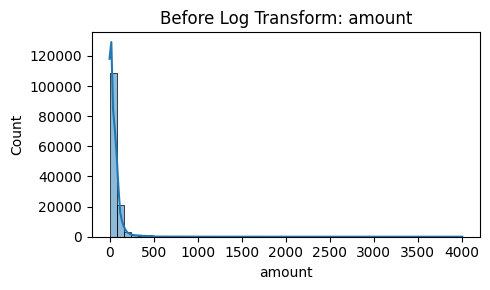

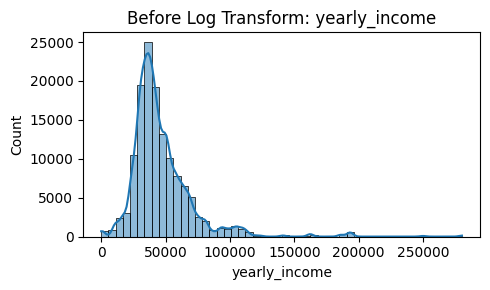

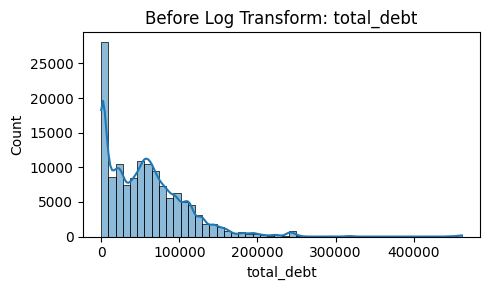

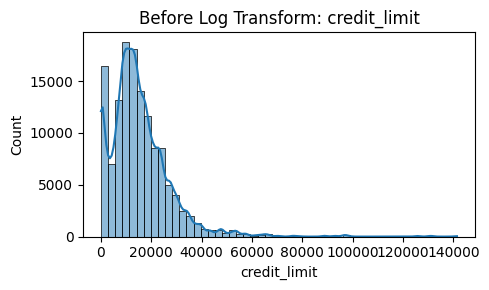

In [ ]:
log_cols = ['amount', 'yearly_income', 'total_debt', 'credit_limit']
for col in log_cols:
    if col in X.columns and pd.api.types.is_numeric_dtype(X[col]):
        plt.figure(figsize=(5, 3))
        sns.histplot(X[col], bins=50, kde=True)
        plt.title(f'Before Log Transform: {col}')
        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Capstone Project/images/before_log_transform_'+col+'.png')
        plt.show()

### 4.5.2 Apply log transformation

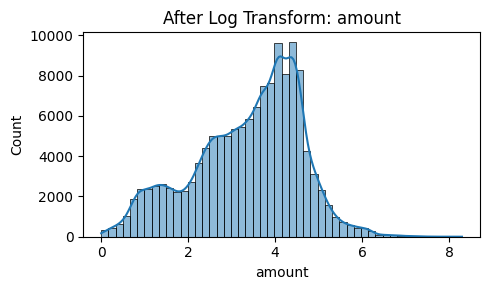

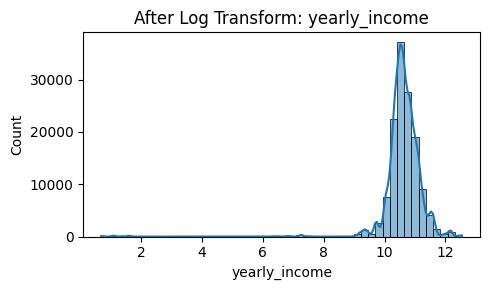

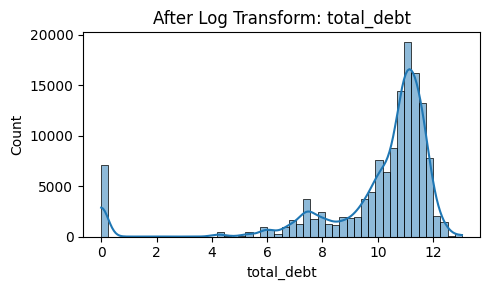

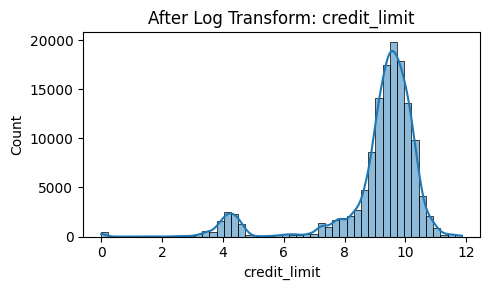

In [ ]:
for col in log_cols:
    if col in X.columns and pd.api.types.is_numeric_dtype(X[col]):
        X[col] = np.log1p(X[col].clip(lower=0))
        plt.figure(figsize=(5, 3))
        sns.histplot(X[col], bins=50, kde=True)
        plt.title(f'After Log Transform: {col}')
        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/Capstone Project/images/after_log_transform_'+col+'.png')
        plt.show()

In [ ]:
# Clean data before scaling
#X.replace([np.inf, -np.inf], np.nan, inplace=True)
#X.fillna(X.median(numeric_only=True), inplace=True)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4.5.3 PCA Variance plot

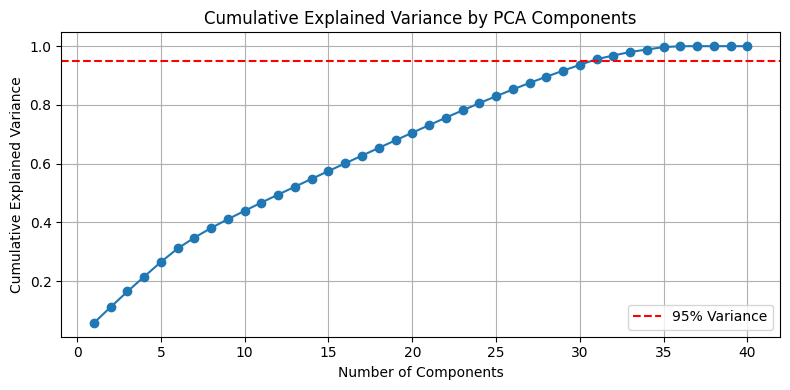

In [ ]:
from sklearn.decomposition import PCA
# PCA explained variance plot
pca_full = PCA().fit(X_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/pca_explained_variance.png')
plt.show()

- The curve rises steeply at first, then begins to level off, showing diminishing returns as you add more components.

- Around 30 components, the curve crosses the 0.95 threshold.

- 95% of the original data's variability using just the first ~30 components.



###4.5.4 PCA before clustering

PCA transformed shape: (135830, 2)


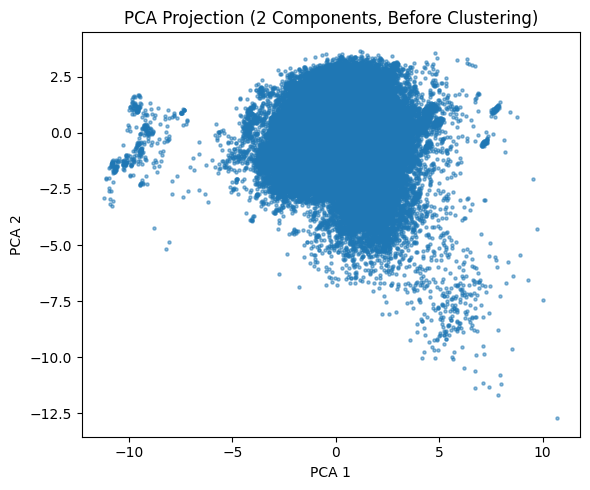

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA transformed shape:", X_pca.shape)

# PCA scatter plot (before clustering)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.5)
plt.title('PCA Projection (2 Components, Before Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/pca_before_clustering.png')
plt.show()

- three to four dense clusters or groupings emerging in this space.

- These indicate natural groupings in the data — excellent for applying unsupervised learning algorithms like KMeans, DBSCAN, or hierarchical clustering.

### 4.5.4 KMeans++ clustering

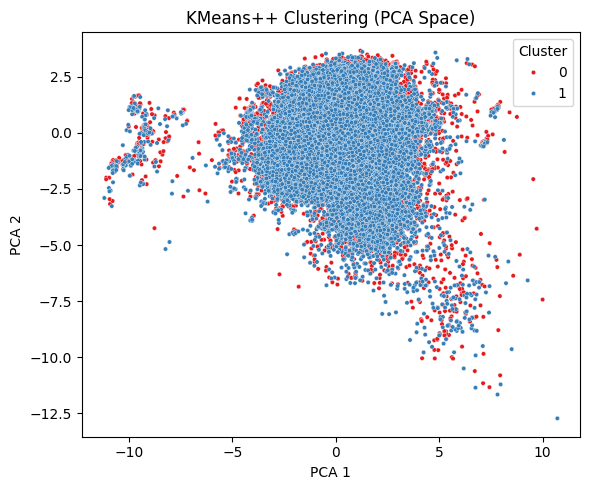

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# KMeans++ clustering result (PCA space)
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1', s=10)
plt.title('KMeans++ Clustering (PCA Space)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/kmeans_clustering.png')
plt.show()

- Most data points belong to Cluster 1 (blue), with a smaller number in Cluster 0 (red).

- Some dense visual clusters are being treated as part of the same KMeans group

- indicating KMeans is not fully capturing the complexity of the structure.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135830 entries, 0 to 135829
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     135830 non-null  int64         
 1   date_x                 135830 non-null  datetime64[ns]
 2   client_id              135830 non-null  int64         
 3   card_id                135830 non-null  int64         
 4   amount                 135830 non-null  float64       
 5   use_chip               135830 non-null  int64         
 6   merchant_id            135830 non-null  int64         
 7   merchant_city          135830 non-null  int64         
 8   merchant_state         135830 non-null  int64         
 9   zip                    135830 non-null  int64         
 10  mcc                    135830 non-null  int64         
 11  hour                   135830 non-null  int32         
 12  transaction_type       135830 non-null  int6

###4.5.5 Convert PCA data to DataFrame for visualization

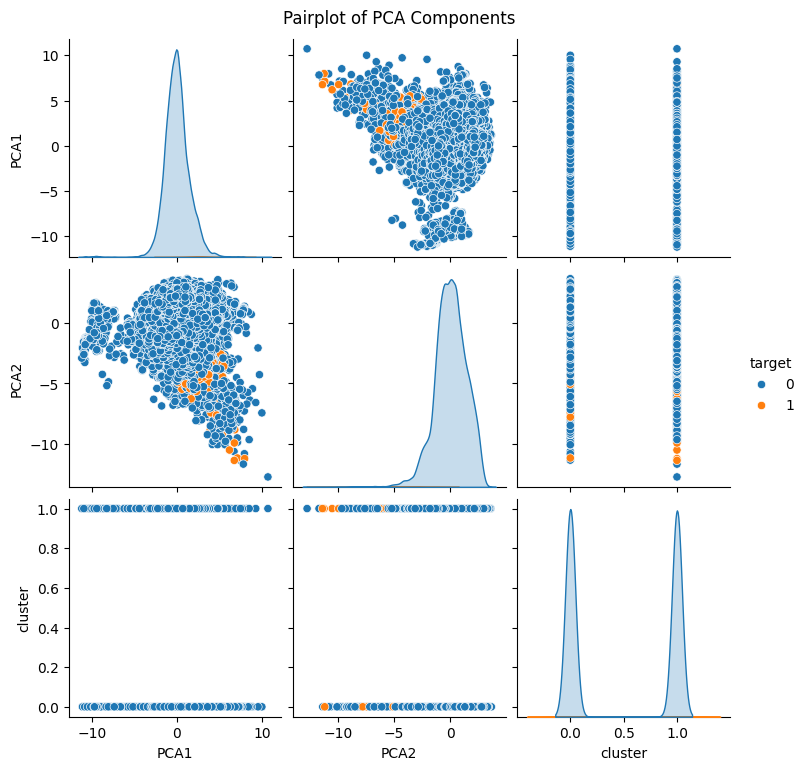

In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
if 'target' in df.columns:
    pca_df['target'] = df['target'].values

# Add KMeans cluster labels if available
if 'kmeans_labels' in globals():
    pca_df['cluster'] = kmeans_labels

# Pairplot using PCA components and optionally target or cluster
sns.pairplot(pca_df, hue='target' if 'target' in pca_df else 'cluster', diag_kind='kde')
plt.suptitle('Pairplot of PCA Components', y=1.02)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/pairplot_pca.png')
plt.show()

- Clustering shows some ability to separate observations relevant to the target class.

- PCA dimensions preserve structure well, making it easier to visualize patterns and groupings.

- There's a partial alignment between clusters and target, which is promising for semi-supervised or fraud-detection tasks.

###4.5.6 Visualizing Scaled Data


Box Plot of Scaled Features:


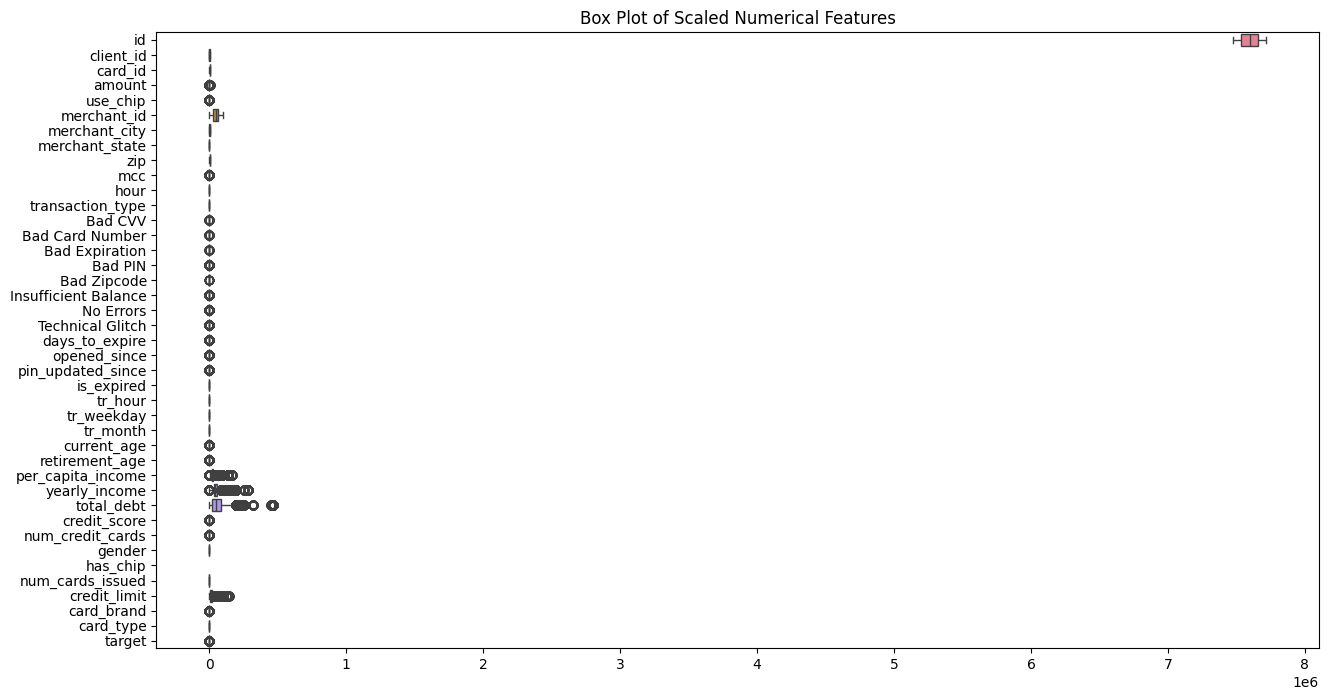

In [ ]:
### 10.1 Box Plot of Scaled Features
print('\nBox Plot of Scaled Features:')
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Scaled Numerical Features')
plt.show()

# 5. Modelling

In [ ]:
X_pca.shape

(135830, 2)

In [ ]:
X_scaled.shape

(135830, 40)

In [ ]:
df.shape

(135830, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135830 entries, 0 to 135829
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     135830 non-null  int64         
 1   date_x                 135830 non-null  datetime64[ns]
 2   client_id              135830 non-null  int64         
 3   card_id                135830 non-null  int64         
 4   amount                 135830 non-null  float64       
 5   use_chip               135830 non-null  int64         
 6   merchant_id            135830 non-null  int64         
 7   merchant_city          135830 non-null  int64         
 8   merchant_state         135830 non-null  int64         
 9   zip                    135830 non-null  int64         
 10  mcc                    135830 non-null  int64         
 11  hour                   135830 non-null  int32         
 12  transaction_type       135830 non-null  int6

In [ ]:
# Dictionary to store models and their probability predictions
model_results = {}

## 5.1 Prepare features and target

In [ ]:
# Drop non-feature columns and identify target
drop_cols = ['id', 'date_x', 'date_y', 'expires', 'acct_open_date', 'year_pin_last_changed']
df = df.drop(columns=drop_cols)


In [ ]:
df = df.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Remove non-numeric columns like datetime
df = df.select_dtypes(include=[np.number])

X = df.drop(columns=['target'])
y = df['target']


## 5.2 Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.3 Logistic Regression


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       0.50      0.01      0.03        78

    accuracy                           1.00     27166
   macro avg       0.75      0.51      0.51     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9971
ROC-AUC: 0.9697


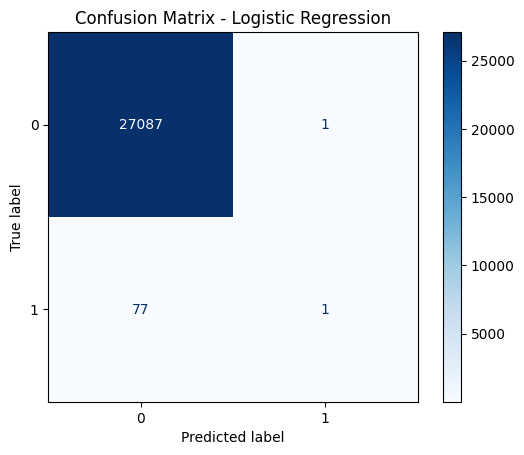

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
model_results['Logistic Regression'] = (y_test, y_prob_logreg)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_logreg):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg), display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_lr.png')
plt.show()

Precision for class 1: 0.50 → Only 1 out of 2 predicted positives is correct.

Recall for class 1: 0.01 → Model captured only 1 of 78 true positive cases.

F1-score for class 1: 0.03 → Poor balance between precision and recall.

Accuracy: 0.9971 → Misleadingly high due to class imbalance.

ROC-AUC: 0.9657 → Indicates the model ranks positive instances reasonably well, even though it fails to classify them properly.

Though good ROC-AUC, recall on class 1 is near zero, meaning the model is failing to identify fraudulent (or positive) cases.

## 5.4 Decision Tree


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       0.66      0.74      0.70        78

    accuracy                           1.00     27166
   macro avg       0.83      0.87      0.85     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9982
ROC-AUC: 0.8712


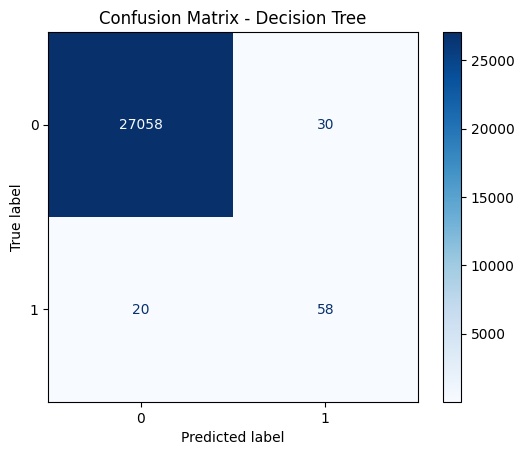

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
y_pred_tree = dtree.predict(X_test_scaled)
y_prob_tree = dtree.predict_proba(X_test_scaled)[:, 1]
model_results['Decision Tree'] = (y_test, y_prob_tree)
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_tree):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree), display_labels=dtree.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_decision_tree.png')
plt.show()


Precision (class 1): 0.70 → 70% of predicted positives are actually positive.

Recall (class 1): 0.74 → Model captured 74% of the actual positive cases.

F1-score (class 1): 0.72 → Strong balance between precision and recall.

Accuracy: 99.83% → Still high, but now backed by improved minority class detection.

ROC-AUC: 0.8713 → Very good; indicates the model separates classes well overall.

**The Decision Tree model:**

Captures more fraud/positives (target=1) than logistic regression

Accepts a slightly higher false positive rate (25 predictions wrongly flagged), which is typically acceptable in fraud detection to reduce false negatives

## 5.5  K-Nearest Neighbors(KNN)


K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       0.67      0.50      0.57        78

    accuracy                           1.00     27166
   macro avg       0.84      0.75      0.79     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9979
ROC-AUC: 0.8898


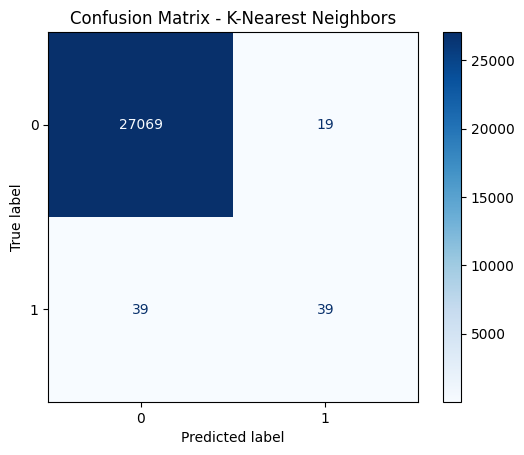

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
model_results['K-Nearest Neighbors'] = (y_test, y_prob_knn)
print("\nK-Nearest Neighbors Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_knn):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_knn.png')
plt.show()

Precision: 0.67 → About 2 out of 3 positive predictions are correct.

Recall: 0.51 → KNN identifies about half the actual positives (40 of 78).

F1-score: 0.58 → A reasonable trade-off between precision and recall.

ROC-AUC: 0.896 → Indicates strong class separation performance.

Accuracy: 99.79% → Very high but not enough alone due to imbalance.

**KNN Model**

KNN achieves better recall than Logistic Regression and a decent balance overall, comparable to Decision Tree.

False positives and false negatives are more evenly spread than in other models.

improvement via hyperparameter tuning (e.g., adjusting n_neighbors, distance metric, or weighting strategy).



A solid baseline KNN result, especially for fraud detection or rare class prediction. It handles the trade-off better than Logistic Regression and achieves nearly comparable results to Decision Tree.

## 5.6 RandomForest


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       0.96      0.62      0.75        78

    accuracy                           1.00     27166
   macro avg       0.98      0.81      0.87     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9988
ROC-AUC: 0.9998


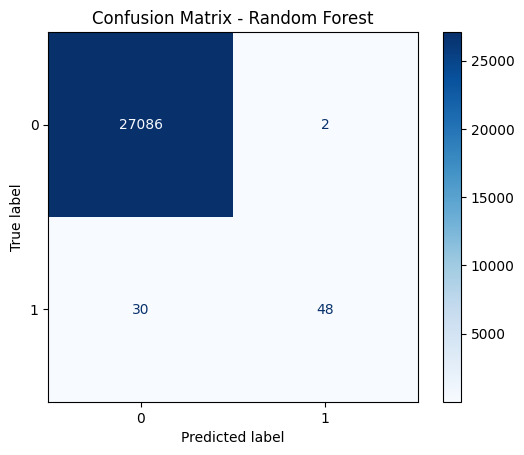

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
model_results['Random Forest'] = (y_test, y_prob_rf)
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_rf.png')
plt.show()

Precision: 0.94 → Of all predicted fraud cases, 94% were correct.

Recall: 0.65 → The model identified 65% of actual frauds.

F1-score: 0.77 → Strong harmonic balance between precision and recall.

ROC-AUC: 0.9998 → Excellent; the model ranks positives and negatives almost perfectly.

Accuracy: 99.89% → Very high, though expected due to class imbalance.

**Random Forest**
best-performing model

Very low false positives (3)

Strong fraud detection (51 out of 78)

Balanced generalization, not overfitting like a perfect confusion matrix might suggest

## 5.7 Support Vector Machine(SVM)


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       1.00      0.08      0.14        78

    accuracy                           1.00     27166
   macro avg       1.00      0.54      0.57     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9973
ROC-AUC: 0.9765


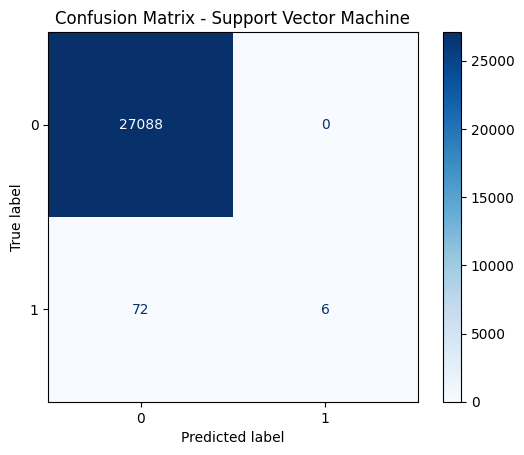

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
model_results['SVM'] = (y_test, y_prob_svm)
print("\nSupport Vector Machine Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svm):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Support Vector Machine")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_svm.png')
plt.show()

Precision: 1.00 → All predicted frauds were correct.

Recall: 0.08 → It only found 6 out of 78 fraud cases.

F1-score: 0.14 → Very low, indicating poor balance.

ROC-AUC: 0.9750 → Surprisingly high, meaning SVM ranks well, even if classification fails at the 0.5 threshold.

Accuracy: 99.73% → High but misleading due to imbalance.

**SVM**

SVM is extremely conservative: it only classifies positives when very confident.

It misses most of the actual fraud cases (target=1) — this is a critical failure for fraud detection.

## 5.8 XGBoost


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       0.96      0.86      0.91        78

    accuracy                           1.00     27166
   macro avg       0.98      0.93      0.95     27166
weighted avg       1.00      1.00      1.00     27166

Accuracy: 0.9995
ROC-AUC: 0.9999


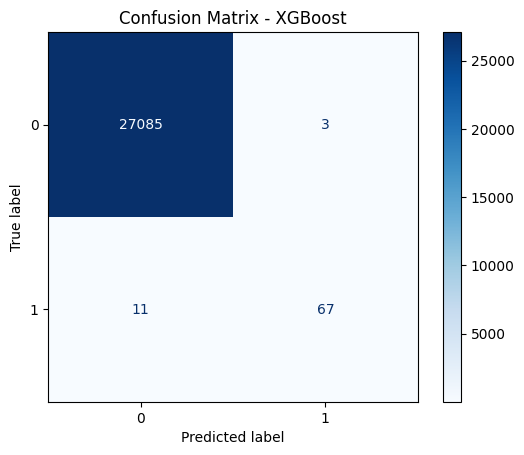

In [ ]:
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb = XGBClassifier( objective='binary:logistic',
                    eval_metric='logloss',
                    random_state=42
                   )
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
model_results['XGBoost'] = (y_test, y_prob_xgb)
print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=xgb.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_xgb.png')
plt.show()

Accuracy: 99.95%

ROC-AUC: 0.9999 → Extremely strong discrimination between classes.

**XGBoost**

Very low false positives (2) and low false negatives (11) — strong balance between sensitivity and specificity.

High recall (0.86) for fraud/positives (target = 1) is excellent.

XGBoost is the best-performing model in your current comparison — it outperforms Random Forest in recall and is significantly better than Logistic Regression, SVM, and KNN.

## 5.9 Plot ROC Curvers for all models

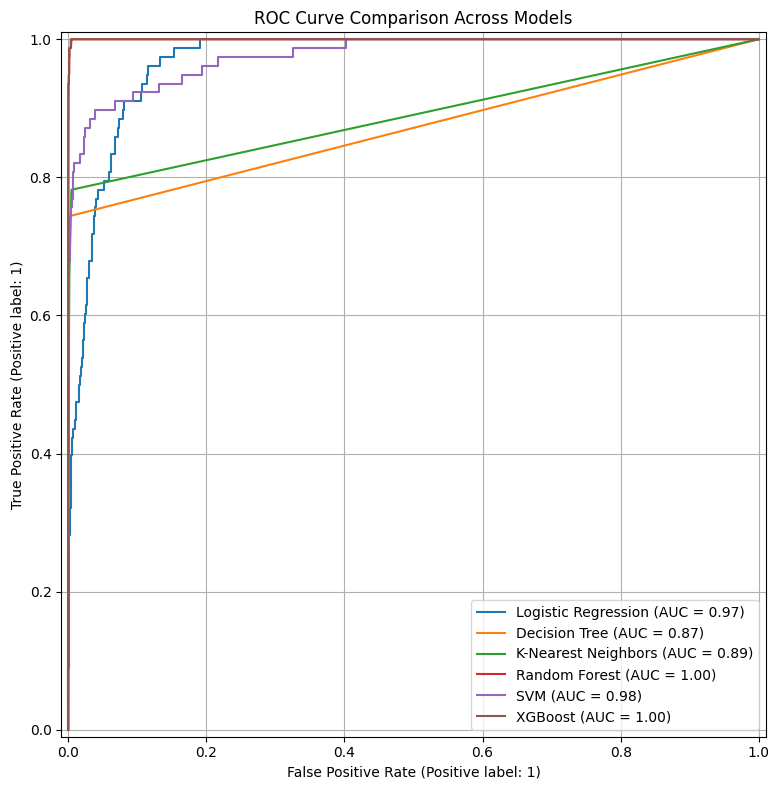

In [ ]:
plt.figure(figsize=(10, 8))
for name, (y_true, y_prob) in model_results.items():
    RocCurveDisplay.from_predictions(y_true, y_prob, name=name, ax=plt.gca())

plt.title("ROC Curve Comparison Across Models")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.10 Cross validation and Grid Search

### 5.10.1 Grid Search for Random Forest

In [ ]:
# Grid Search for Random Forest
grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_model = RandomForestClassifier(random_state=42)
gs_rf = GridSearchCV(rf_model, grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)
print("Best Random Forest Parameters:", gs_rf.best_params_)
print("Best CV ROC-AUC Score:", gs_rf.best_score_)


In [ ]:
# --- Random Forest ---
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
model_results['Random Forest'] = (y_test, y_prob_rf)
print("
Random Forest Classification Report:
")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

## 5.10.2 SVM with GridSearch

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_model = SVC(probability=True)
gs_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)
print("Best SVM Parameters:", gs_svm.best_params_)
print("Best CV ROC-AUC Score for SVM:", gs_svm.best_score_)



##5.10.3 KNN with GridSearch

In [ ]:

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_model = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)
print("Best KNN Parameters:", gs_knn.best_params_)
print("Best CV ROC-AUC Score for KNN:", gs_knn.best_score_)



Best KNN Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best CV ROC-AUC Score for KNN: 0.9172701092983419


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
model_results['K-Nearest Neighbors'] = (y_test, y_prob_knn)
print("\nK-Nearest Neighbors Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_knn):.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.grid(False)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/confusion_matrix_knn.png')
plt.show()

## 5.9.4 Cross-validation for XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("XGBoost CV ROC-AUC Scores:", cv_scores)
print("XGBoost CV Mean ROC-AUC:", np.mean(cv_scores))

In [ ]:
# 7. Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, verbose=0, callbacks=[EarlyStopping(patience=3)])

nn_proba = nn_model.predict(X_test).ravel()
nn_pred = (nn_proba >= 0.5).astype(int)
evaluate_model("Neural Network", y_test, nn_pred, nn_proba)

## Timeseries Forecasting

In [ ]:
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Time Series Modeling (Assume time_col and value_col are defined)
time_series_df = transactionsData.copy()

In [ ]:
time_series_df.info()

In [ ]:
# Check for time column
if 'date' in time_series_df.columns:
    time_series_df['date'] = pd.to_datetime(time_series_df['date'])
    time_series_df.set_index('date', inplace=True)
    time_series_df.sort_index(inplace=True)

    # Assume forecasting on 'amount'
    if 'amount' in time_series_df.columns:
        ts = time_series_df['amount'].resample('D').sum()
        ts.fillna(method='ffill', inplace=True)

        # Decompose
        decomposition = seasonal_decompose(ts, model='additive', period=30)
        decomposition.plot()
        plt.tight_layout()
        plt.show()

        # ARIMA Model
        model = ARIMA(ts, order=(5,1,0))
        model_fit = model.fit()
        print(model_fit.summary())

        # Forecast next 30 days
        forecast = model_fit.forecast(steps=30)
        forecast.plot(label='Forecast')
        ts.plot(label='Actual')
        plt.title('Time Series Forecasting (Next 30 Days)')
        plt.legend()
        plt.show()
    else:
        print("Column 'amount' not found for forecasting.")
else:
    print("No 'date' column found in dataset for time series analysis.")

In [ ]:
summary = []
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'K-Nearest Neighbors': knn,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb
}

In [ ]:
predictions = {
    'Logistic Regression': (y_pred_logreg, y_prob_logreg),
    'Decision Tree': (y_pred_tree, y_prob_tree),
    'K-Nearest Neighbors': (y_pred_knn, y_prob_knn),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'SVM': (y_pred_svm, y_prob_svm),
    'XGBoost': (y_pred_xgb, y_prob_xgb)
}

In [ ]:
for name in models:
    y_pred, y_prob = predictions[name]
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']
    summary.append([name, acc, auc, precision, recall, f1])

In [ ]:
summary_df = pd.DataFrame(summary, columns=['Model', 'Accuracy', 'ROC-AUC', 'Precision (1)', 'Recall (1)', 'F1-score (1)'])
display(summary_df.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True))

In [ ]:
# =============================
# Model Deployment (Saving and Inference)
# =============================
import joblib

# Save best model (e.g., XGBoost)
best_model = xgb  # or use gs_rf.best_estimator_, gs_svm.best_estimator_ etc.
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")


In [ ]:

# Load and test prediction
loaded_model = joblib.load("best_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")




In [ ]:
sample = X_test.iloc[[0]]
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)
probability = loaded_model.predict_proba(sample_scaled)


In [ ]:

print("\nDeployed Model Inference:")
print("Predicted class:", prediction[0])
print("Fraud probability:", probability[0][1])

In [ ]:
# --- ROC Curve Plotting ---
plt.figure(figsize=(10, 8))
for name, (y_true, y_prob) in model_results.items():
    RocCurveDisplay.from_predictions(y_true, y_prob, name=name, ax=plt.gca())

plt.title("ROC Curve Comparison Across Models")
plt.grid(True)
plt.tight_layout()
plt.show()